# LendingClub 

https://www.lendingclub.com/info/download-data.action

This website has data from 2019 Q1 back to 2007.  The most recent data is broken up into quaters. I have imported LoanStats_2019Q1(loan2019q1) the 2019 Q1 data.  I will use the 2018-2019 data for this analysis.
Here is the older data.

The data contain complete loan data for all loans issued through the time period stated, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. 


1. Supervised Learning - to predict the good loans vs bad loans
2. Unsupervised Learning - see if there are any similar groups missed in the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

__LendingClub provides a dictionary with the attributes information.  This will be used to determine what features to drop.__

In [2]:
# read in dict that explains all the features/attributes
loanAttributes = pd.read_excel('LCDataDictionary.xlsx')
# setting column width to help read data dict
pd.options.display.max_colwidth = 255
# look at top of dict
print('records: ' + str(len(loanAttributes)))

records: 153


In [3]:
loanAttributes.isnull().any()
loanAttributes.dropna(inplace=True)

In [4]:
loanAttributes.head(3)

LoanStatNew  \
0        acc_now_delinq   
1  acc_open_past_24mths   
2            addr_state   

                                                       Description  
0  The number of accounts on which the borrower is now delinquent.  
1                       Number of trades opened in past 24 months.  
2       The state provided by the borrower in the loan application

In [5]:
loanAttributes[loanAttributes['LoanStatNew'] == 'out_prncp']
# loanAttributes.iloc[42]

LoanStatNew                                              Description
80   out_prncp  Remaining outstanding principal for total amount funded

-----

___Read in the quarterly data and combine the files for 2018 and 2019 into one dataframe.___

LoanStats_2018Q1.csv,
LoanStats_2018Q2.csv,
LoanStats_2018Q3.csv,
LoanStats_2018Q4.csv,
LoanStats_2019Q1.csv

In [6]:
from glob import glob
loan = sorted(glob('LoanStats_201*.csv'))

In [7]:
loans = pd.concat((pd.read_csv(file,
                               low_memory=False,
                               skiprows=[0])[:-2]
                   for file in loan),
                  ignore_index=True)

In [8]:
loans.to_csv('loans.csv')

In [9]:
loans = pd.read_csv('loans.csv', index_col=0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (124,125,126,129,130,131,134,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
loans.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN    25000.0      25000.0          25000.0   60 months   
1 NaN        NaN    11200.0      11200.0          11200.0   60 months   
2 NaN        NaN    10000.0      10000.0          10000.0   60 months   
3 NaN        NaN     6500.0       6500.0           6500.0   36 months   
4 NaN        NaN     6000.0       6000.0           6000.0   36 months   

  int_rate  installment grade sub_grade       ...         \
0   21.85%       688.35     D        D5       ...          
1   30.79%       367.82     G        G1       ...          
2   12.61%       225.54     C        C1       ...          
3    6.07%       197.95     A        A2       ...          
4   10.41%       194.77     B        B3       ...          

  orig_projected_additional_accrued_interest hardship_payoff_balance_amount  \
0                                        NaN                            NaN   
1                                        NaN                            NaN   
2                                        NaN                            NaN   
3                                        NaN                            NaN   
4                                        NaN                            NaN   

  hardship_last_payment_amount  debt_settlement_flag  \
0                          NaN                     N   
1                          NaN                     N   
2                          NaN                     N   
3                          NaN                     N   
4                          NaN                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount  settlement_percentage  settlement_term  
0               NaN                    NaN              NaN  
1               NaN                    NaN              NaN  
2               NaN                    NaN              NaN  
3               NaN                    NaN              NaN  
4               NaN                    NaN              NaN  

[5 rows x 144 columns]

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610917 entries, 0 to 610916
Columns: 144 entries, id to settlement_term
dtypes: float64(108), object(36)
memory usage: 675.8+ MB


In [12]:
loans.shape

(610917, 144)

___There are 610917 rows and 144 columns with data types of floats and objects.  Let's look to see what the unique values are in the dataframe.___

In [13]:
for var in loans:
    print(var, '\n', loans[var].unique(), '\n')

id 
 [nan] 

member_id 
 [nan] 

loan_amnt 
 [25000. 11200. 10000. ...  1425.  2025. 35125.] 

funded_amnt 
 [25000. 11200. 10000. ...  1425.  2025. 35125.] 

funded_amnt_inv 
 [25000.         11200.         10000.         ...  4938.25625391
  2025.         35125.        ] 

term 
 [' 60 months' ' 36 months'] 

int_rate 
 [' 21.85%' ' 30.79%' ' 12.61%' '  6.07%' ' 10.41%' '  7.34%' ' 17.47%'
 '  9.92%' ' 20.39%' ' 13.58%' ' 11.98%' '  7.96%' ' 18.45%' '  9.43%'
 '  6.71%' '  5.31%' ' 15.04%' ' 10.90%' ' 16.01%' ' 14.07%' ' 24.84%'
 ' 19.42%' ' 23.87%' ' 26.77%' ' 25.81%' ' 30.65%' ' 28.72%' ' 30.17%'
 ' 22.90%' ' 29.69%' ' 30.75%' ' 11.99%' ' 20.00%' ' 30.94%' '  6.00%'
 ' 15.05%' ' 17.09%' '  6.08%' '  7.35%' ' 10.91%' ' 12.62%' '  9.93%'
 ' 24.85%' ' 18.06%' ' 23.88%' ' 14.08%' ' 10.42%' '  9.44%' '  6.72%'
 ' 19.03%' ' 16.02%' ' 21.45%' ' 13.59%' '  5.32%' '  7.97%' ' 25.82%'
 ' 26.30%' ' 22.91%' ' 30.84%' ' 30.99%' ' 30.89%' ' 13.06%' ' 14.03%'
 ' 16.46%' '  8.08%' '  6.83%' ' 14.5

revol_util 
 ['98.4%' '24.6%' '37.7%' ... '131.3%' '107.8%' '107.3%'] 

total_acc 
 [ 16.  14.  23.  12.  30.   9.  18.  53.  24.   8.  25.  27.  39.  22.
  33.  15.  38.  26.  37.  21.  29.  13.  32.  36.  17.  20.  10.  31.
  35.   3.  50.  11.  44.  34.   6.  57.  47.  19.  28.  43.  42.   4.
  45.   7.  51.  41.  64.  55.  62.   5.  52.  49.   2.  61.  40.  83.
  74.  54.  77.  65.  46.  56.  59.  66.  63.  48.  60.  73.  85.  58.
  70.  76.  68.  86.  69.  82.  88.  72.  90.  75.  67.  87.  81.  95.
  78.  71. 106.  79. 116.  89.  84.  93. 153. 129.  80. 101.  97.  92.
  98. 125. 115.  91. 110.  96. 113. 133.  99. 103. 117. 119. 138.  94.
 118. 100. 102. 111. 108. 140. 112. 105. 107. 123. 109. 120. 148. 114.
 104. 128. 160. 145. 164. 142.] 

initial_list_status 
 ['w' 'f'] 

out_prncp 
 [21320.11  9866.69  8331.42 ...  4558.63  3486.63 28037.11] 

out_prncp_inv 
 [21320.11  9866.69  8331.42 ...  4558.63  3486.63 28037.11] 

total_pymnt 
 [ 9576.21  5111.16  2918.01 ...  1328.11   

acc_open_past_24mths 
 [ 2.  5. 13.  4.  3.  1. 15.  7.  8. 12.  0.  6. 11.  9. 10. 17. 21. 14.
 18. 16. 26. 19. 22. 20. 28. 24. 23. 29. 27. 35. 30. 25. 36. 37. 38. 33.
 31. 32. 44. 34. 54. 40. 43. 41. 39. 45.] 

avg_cur_bal 
 [ 10685.   8397.  17600. ... 109050. 104651. 206287.] 

bc_open_to_buy 
 [6.3000e+01 6.3200e+02 4.1930e+03 ... 4.7646e+04 6.9994e+04 4.1467e+04] 

bc_util 
 [ 98.1  66.7  66.5 ... 122.5 126.5 149.7] 

chargeoff_within_12_mths 
 [0. 1. 3. 2. 7. 4. 9. 6. 5.] 

delinq_amnt 
 [0.0000e+00 2.3930e+03 6.9700e+02 4.0300e+02 3.2520e+03 1.9090e+03
 1.4430e+03 1.6000e+02 7.5300e+02 2.4000e+01 1.3520e+03 6.5400e+02
 9.9180e+03 9.9730e+03 2.3600e+02 4.3500e+02 6.4300e+03 9.8000e+01
 6.2750e+03 1.7560e+03 1.8270e+03 3.2850e+03 3.0430e+03 1.0486e+04
 3.5480e+03 1.5700e+02 2.3840e+03 9.1700e+02 1.4530e+03 1.1150e+03
 1.1500e+02 1.2870e+03 7.0000e+01 2.6000e+01 2.2140e+03 9.3490e+03
 9.3000e+02 5.2000e+01 1.2360e+03 5.5468e+04 1.7500e+03 2.8820e+03
 6.5000e+04 6.4000e+01 1.0300e+

num_bc_tl 
 [ 1.  3. 11.  2. 15.  5.  4. 16.  9. 10.  7.  8. 12.  6. 14. 13. 19. 18.
 23.  0. 33. 20. 35. 21. 24. 17. 22. 26. 31. 27. 25. 28. 38. 30. 29. 36.
 37. 43. 46. 32. 40. 86. 44. 45. 34. 42. 41. 49. 60. 39. 47. 82. 48. 55.
 59. 66. 54. 58. 51. 85. 50. 65. 57. 52. 69. 53.] 

num_il_tl 
 [  4.   8.   3.   2.   7.   1.   0.  11.  15.   6.  27.  12.   9.   5.
  20.  14.  19.  23.  10.  24.  13.  18.  32.  17.  30.  25.  21.  16.
  33.  31.  28.  22.  34.  48.  44.  56.  26.  37.  35.  40.  29.  36.
  45.  39.  38.  53.  42.  46.  50.  57.  47.  49.  41.  67.  51.  55.
  59.  58.  43.  52.  65.  60.  69.  66.  54. 105.  61.  77.  64.  86.
  73.  78.  63.  81.  72.  70.  99.  98. 109.  62.  76.  68. 107.  83.
  79.  89.  82.  71.  75. 116. 101.  91.  84.  80.  74.  93.  88.  96.
 130.  90. 149.  85.] 

num_op_rev_tl 
 [ 3.  4. 16.  5.  8.  6. 14.  2. 13.  7. 12. 20. 11. 10. 19.  9. 17. 15.
  0. 22. 18. 21. 24. 30. 33.  1. 25. 41. 32. 27. 23. 26. 36. 28. 31. 35.
 29. 44. 34. 38. 37. 3

hardship_dpd 
 [nan  9.  7. 14. 15. 19. 24. 26.  8. 21.  1. 29. 22. 13.  3. 27. 17.  5.
 10.  0.  4. 16. 18. 11.  6. 20.  2. 28. 23. 12. 25. 30.] 

hardship_loan_status 
 [nan 'In Grace Period' 'Late (16-30 days)' 'Current' 'Late (31-120 days)'
 'Issued'] 

orig_projected_additional_accrued_interest 
 [    nan  191.64 1718.49  569.07  528.27  614.97 1186.11  755.19  357.87
  612.75  809.13  140.01  693.81  408.36  489.75   97.53  866.58  757.5
  785.91  378.81  917.58  341.67 1597.53  368.64  446.67  852.42   93.09
 1725.84  731.46  380.4  1005.66  387.03  486.18 1025.55   31.47  852.15
  650.46  767.31  224.67  289.11  225.78  163.86  108.15  200.43  183.3
 2154.75  193.32  324.36  118.65  976.53  969.96 1005.54  258.72  653.34
  173.55 1688.07  951.39 1491.33  549.54  391.08  882.96  798.33  244.89
 1417.92  900.69  182.82  746.61 1374.6   511.41 1297.98  422.43  254.73
  334.65  766.05  741.66  676.26  341.79  240.99 2513.04  186.54  269.22
 2535.66  421.23  956.28  660.87  800.91  

## Data Cleaning
__1)__ Remove all features missing 50% or more of their values.

__2)__ Features missing 50% or less, the mean will be used to fill in those values.

__3)__ Remove all features that are not of use to an under writer, the features that come after the loan is approved, such as interest rate.

In [14]:
loans['revol_util'] = loans['revol_util'].map(lambda x: str(x).rstrip('%'))

_Drop all features with missing values greater than 50%_

In [15]:
percentNull = 100 * loans.isnull().sum() / len(loans)
missing = pd.concat([loans.isnull().sum(), percentNull], axis=1)

In [16]:
loans.shape, missing.shape

((610917, 144), (144, 2))

In [17]:
missing = missing.rename(columns={
    0: '50%_Missing',
    1: 'Percent_Missing'})
missing = missing[missing['Percent_Missing'] > 50]
print('total number of features missing 50% or more of their values are {}'.format(len(missing)))
missing.sort_values(by='Percent_Missing')

total number of features missing 50% or more of their values are 43


50%_Missing  Percent_Missing
mths_since_last_delinq                           342451        56.055242
mths_since_recent_revol_delinq                   435331        71.258616
mths_since_last_major_derog                      471086        77.111293
mths_since_recent_bc_dlq                         490209        80.241506
sec_app_chargeoff_within_12_mths                 525251        85.977473
sec_app_num_rev_accts                            525251        85.977473
sec_app_open_act_il                              525251        85.977473
sec_app_open_acc                                 525251        85.977473
sec_app_mort_acc                                 525251        85.977473
sec_app_inq_last_6mths                           525251        85.977473
sec_app_earliest_cr_line                         525251        85.977473
revol_bal_joint                                  525251        85.977473
sec_app_collections_12_mths_ex_med               525251        85.977473
dti_joint                                        525251        85.977473
annual_inc_joint                                 525251        85.977473
sec_app_revol_util                               526678        86.211056
verification_status_joint                        532282        87.128366
mths_since_last_record                           534510        87.493064
sec_app_mths_since_last_major_derog              583639        95.534909
settlement_status                                610051        99.858246
settlement_date                                  610051        99.858246
settlement_amount                                610051        99.858246
debt_settlement_flag_date                        610051        99.858246
settlement_term                                  610051        99.858246
settlement_percentage                            610051        99.858246
hardship_reason                                  610327        99.903424
hardship_last_payment_amount                     610327        99.903424
hardship_payoff_balance_amount                   610327        99.903424
hardship_type                                    610327        99.903424
hardship_dpd                                     610327        99.903424
hardship_length                                  610327        99.903424
hardship_loan_status                             610327        99.903424
hardship_end_date                                610327        99.903424
hardship_start_date                              610327        99.903424
hardship_amount                                  610327        99.903424
deferral_term                                    610327        99.903424
hardship_status                                  610327        99.903424
payment_plan_start_date                          610327        99.903424
orig_projected_additional_accrued_interest       610430        99.920284
desc                                             610917       100.000000
url                                              610917       100.000000
member_id                                        610917       100.000000
id                                               610917       100.000000

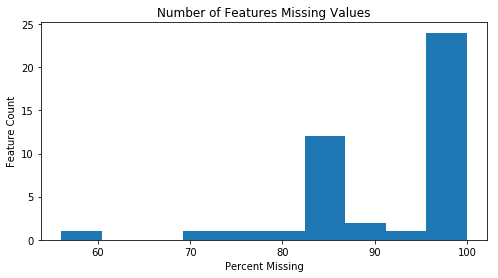

In [18]:
plt.figure(figsize=(8,4))
missing.Percent_Missing.plot.hist(bins=10)
plt.title('Number of Features Missing Values')
plt.xlabel('Percent Missing')
plt.ylabel('Feature Count');

There are about 24 features with over 90% of their values missing. We will drop all 43 of the features.

In [19]:
for val in missing.index:
    print(val)
    loans.drop([val], inplace=True, axis=1)

id
member_id
url
desc
mths_since_last_delinq
mths_since_last_record
mths_since_last_major_derog
annual_inc_joint
dti_joint
verification_status_joint
mths_since_recent_bc_dlq
mths_since_recent_revol_delinq
revol_bal_joint
sec_app_earliest_cr_line
sec_app_inq_last_6mths
sec_app_mort_acc
sec_app_open_acc
sec_app_revol_util
sec_app_open_act_il
sec_app_num_rev_accts
sec_app_chargeoff_within_12_mths
sec_app_collections_12_mths_ex_med
sec_app_mths_since_last_major_derog
hardship_type
hardship_reason
hardship_status
deferral_term
hardship_amount
hardship_start_date
hardship_end_date
payment_plan_start_date
hardship_length
hardship_dpd
hardship_loan_status
orig_projected_additional_accrued_interest
hardship_payoff_balance_amount
hardship_last_payment_amount
debt_settlement_flag_date
settlement_status
settlement_date
settlement_amount
settlement_percentage
settlement_term


_Handling the dtypes that are objects_

In [20]:
loans['emp_length'].fillna('No Info', inplace=True)
loans['emp_title'].fillna('No Info', inplace=True)

_For the missing values that are left, the mean will be used._

In [21]:
nulls = 100 * loans.isnull().sum() / len(loans)
missing2 = pd.concat([loans.isnull().sum(), nulls], axis=1)


missing2 = missing2.rename(columns={
    0: '10%_Missing',
    1: 'Percent_Missing'})
missing2 = missing2[missing2['Percent_Missing'] > 0]
missing2

10%_Missing  Percent_Missing
dti                           1389         0.227363
last_pymnt_d                   871         0.142573
next_pymnt_d                 79117        12.950532
last_credit_pull_d               7         0.001146
mths_since_rcnt_il           21927         3.589195
il_util                      98143        16.064866
all_util                       153         0.025044
avg_cur_bal                     47         0.007693
bc_open_to_buy                7911         1.294939
bc_util                       8181         1.339134
mo_sin_old_il_acct           21927         3.589195
mths_since_recent_bc          7456         1.220460
mths_since_recent_inq        75662        12.384988
num_tl_120dpd_2m             15550         2.545354
pct_tl_nvr_dlq                   2         0.000327
percent_bc_gt_75              7925         1.297230

In [22]:
missing2Num = [var for var in missing2.index if loans[var].dtype != 'O']
missing2Cat = [var for var in missing2.index if loans[var].dtype == 'O']

In [23]:
# replace with mean value for numerical values
for var in missing2Num:
    loans[var].fillna(loans[var].mean(), inplace=True)

In [24]:
percentNull3 = 100 * loans.isnull().sum() / len(loans)
missing3 = pd.concat([loans.isnull().sum(), percentNull3], axis=1)

missing3 = missing3.rename(columns={
    0: '50%_Missing',
    1: 'Percent_Missing'})
missing3 = missing3[missing3['Percent_Missing'] > 0]
missing3.sort_values(by='Percent_Missing')

50%_Missing  Percent_Missing
last_credit_pull_d            7         0.001146
last_pymnt_d                871         0.142573
next_pymnt_d              79117        12.950532

__For the remaining NAN values(the columns will be dropped as they are not relavent for this model__

In [25]:
loanAttributes[loanAttributes['LoanStatNew'] == 'last_credit_pull_d']
#loanAttributes[loanAttributes['LoanStatNew'] == 'last_pymnt_d']
#loanAttributes[loanAttributes['LoanStatNew'] == 'next_pymnt_d']

LoanStatNew                                           Description
36  last_credit_pull_d  The most recent month LC pulled credit for this loan

In [26]:
for val in missing3.index:
    print(val)
    loans.drop([val], inplace=True, axis=1)

last_pymnt_d
next_pymnt_d
last_credit_pull_d


In [27]:
loans.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
                             ..
mo_sin_o

In [28]:
loans.shape

(610917, 98)

In [29]:
loans.to_csv('loans_noMissingValues.csv')

___Now that all the null values are removed, I can remove the last of the columns that are not needed.  They are the features that occur after the loan has already been approved.  Again we are trying to predict the number of good loans.___

In [30]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'in

In [31]:
loanAttributes[loanAttributes['LoanStatNew'] == 'grade']

LoanStatNew             Description
25       grade  LC assigned loan grade

In [32]:
loans.drop(['funded_amnt',
            'funded_amnt_inv',
            'int_rate',
            'total_pymnt',
            'total_pymnt_inv',
            'total_rec_prncp',
            'total_rec_int',
            'total_rec_late_fee',
            'recoveries',
            'collection_recovery_fee',
            'last_pymnt_amnt',
            'tot_coll_amt',
            'tot_cur_bal',
            'total_bal_il',
            'hardship_flag',
            'debt_settlement_flag',
            'out_prncp',
            'out_prncp_inv',
            'num_tl_120dpd_2m',
            'acc_now_delinq',
            'num_tl_120dpd_2m',
            'num_tl_30dpd',
            'policy_code',
            'term'
            ], inplace=True, axis=1)

In [33]:
loans.isnull().sum()

loan_amnt                     0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
collections_12_mths_ex_med    0
application_type              0
open_acc_6m                   0
open_act_il                   0
                             ..
bc_util 

___The features above are features that come after the loan has been approved, therefore they will be dropped.___

In [34]:
loans.columns

Index(['loan_amnt', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'collections_12_mths_ex_med',
       'application_type', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_1

In [35]:
loans.shape

(610917, 75)

In [36]:
loans.to_csv('cleanedLendingClub.csv')

----------

___We have to deal with the features that have dates.  A loan can't be predicted from the same day.  So we have to subtract at least 30 days from the current date to underwrite the loan.___

In [37]:
# the issue data will be the date that is
# used to forcast with the time series
loans.issue_d.value_counts()

May-2018    46311
Oct-2018    46305
Aug-2018    46079
Jan-2019    43584
Jul-2018    43089
Apr-2018    42928
Nov-2018    41973
Jun-2018    41533
Dec-2018    40134
Sep-2018    39026
Mar-2018    38771
Jan-2018    36347
Mar-2019    36106
Feb-2019    35985
Feb-2018    32746
Name: issue_d, dtype: int64

In [38]:
# convert the data for the feature 'issued_d'
loans['issue_d_xx'] = pd.to_datetime(loans['issue_d'])

maxDate = max(loans.issue_d_xx)
loans['issue_d_diff'] = (maxDate - loans.issue_d_xx)
loans['issue_d_diff'] = loans['issue_d_diff'].dt.days
loans['months_since_issue_d'] = loans['issue_d_diff']/30.5
loans = loans.drop(['issue_d_xx', 'issue_d_diff'], axis=1)

In [39]:
loans.shape, loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610917 entries, 0 to 610916
Data columns (total 76 columns):
loan_amnt                     610917 non-null float64
installment                   610917 non-null float64
grade                         610917 non-null object
sub_grade                     610917 non-null object
emp_title                     610917 non-null object
emp_length                    610917 non-null object
home_ownership                610917 non-null object
annual_inc                    610917 non-null float64
verification_status           610917 non-null object
issue_d                       610917 non-null object
loan_status                   610917 non-null object
pymnt_plan                    610917 non-null object
purpose                       610917 non-null object
title                         610917 non-null object
zip_code                      610917 non-null object
addr_state                    610917 non-null object
dti                           610917 n

((610917, 76), None)

---------

__Dropping all values that don't apply to loan approval for the loan status___

In [40]:
loans.loan_status.value_counts()

Current               518013
Fully Paid             65793
Charged Off            13324
Late (31-120 days)      8798
In Grace Period         2865
Late (16-30 days)       2116
Default                    8
Name: loan_status, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

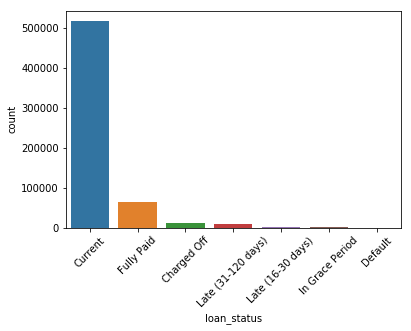

In [41]:
loan_stat = loans["loan_status"]
sns.countplot(loan_stat)
stat_temp = loans.loan_status.value_counts().sum()
plt.xticks(rotation=45)

In [42]:
loans = loans[loans['loan_status'] != 'Current']
loans = loans[loans['loan_status'] != 'In Grace Period']
loans = loans[loans['loan_status'] != 'Late (16-30 days)']

In [43]:
loans.loan_status.value_counts()

Fully Paid            65793
Charged Off           13324
Late (31-120 days)     8798
Default                   8
Name: loan_status, dtype: int64

In [44]:
loans['good_loan_status'] = loans['loan_status'] == 'Fully Paid'
ls_map = {True: 1, False: 0}
loans['good_loan_status'] = loans['good_loan_status'].map(ls_map)

1    65793
0    22130
Name: good_loan_status, dtype: int64 
baseline: 0.7483



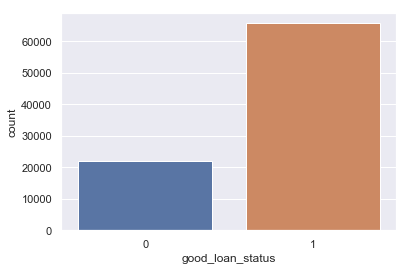

In [97]:
# baseline (56725/(56725+16593) - if predict all ones
sns.set(style="darkgrid")
good = loans['good_loan_status']
sns.countplot(good)
good_temp = loans['good_loan_status'].value_counts()
print(good_temp,
      '\nbaseline: {:.4f}\n'.format(1-(good_temp[0]/(good_temp[0]+good_temp[1]))))

___About 74.83% of the remaining loans have been fully paid and 25% have charged off, late or in default, so we have a somewhat unbalanced classification problem.___

_Categorical and Numerical values_

In [46]:
# numerical and categorical variables
loans_numerical = loans.select_dtypes(include=['float64', 'int64'])
loans_categorical = loans.select_dtypes(include=['object'])

In [47]:
# for cats in loans_categorical:
#print('\n\n' + cats+'\n****************')
# print(loans[cats].value_counts())

In [48]:
# for nums in loans_numerical:
#print('\n\n' + nums+'\n****************')
# print(loans[nums].value_counts())

# Data Visulizations

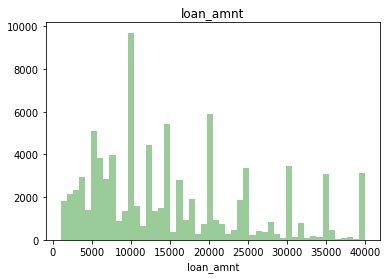

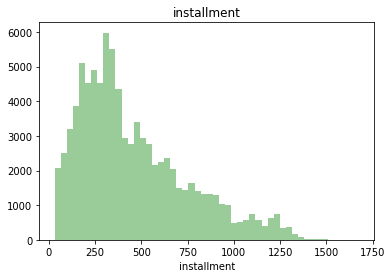

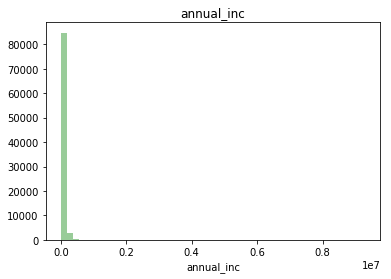

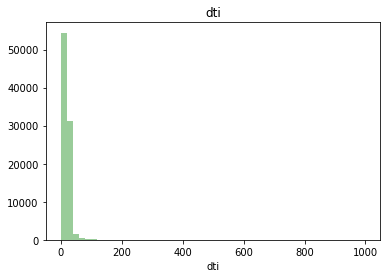

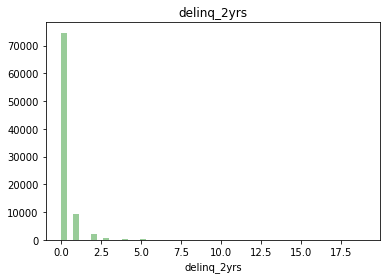

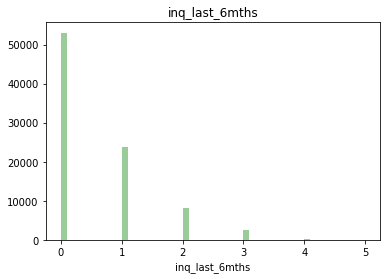

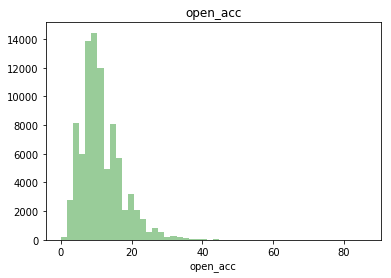

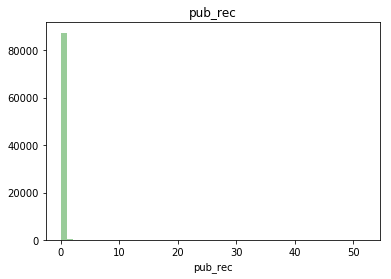

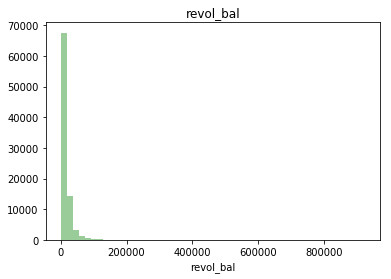

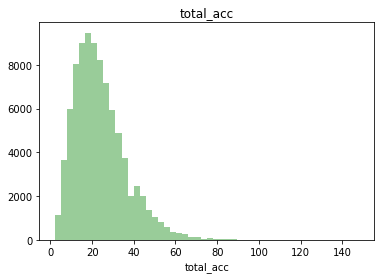

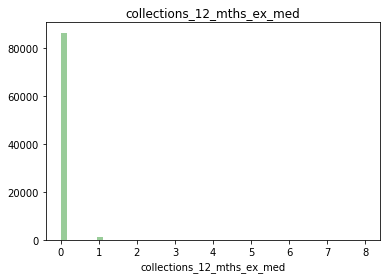

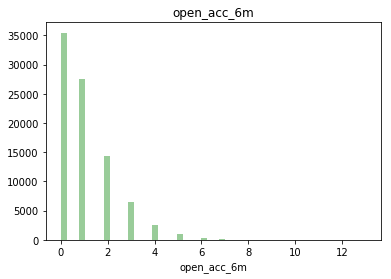

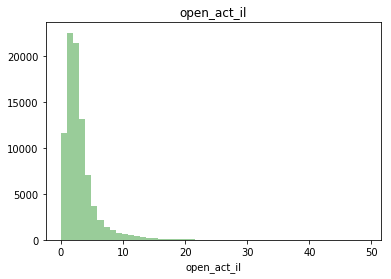

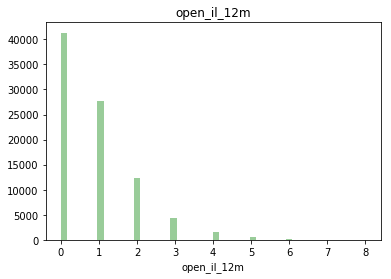

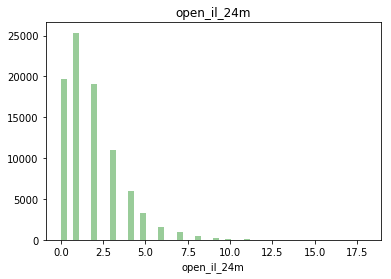

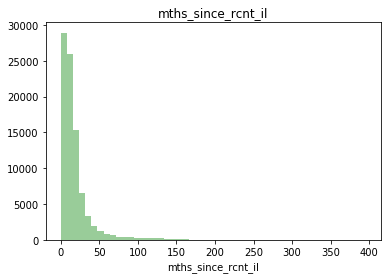

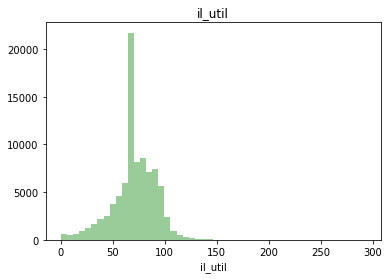

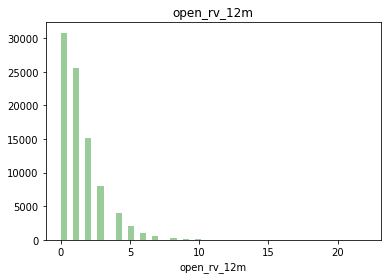

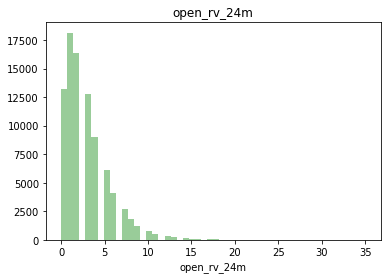

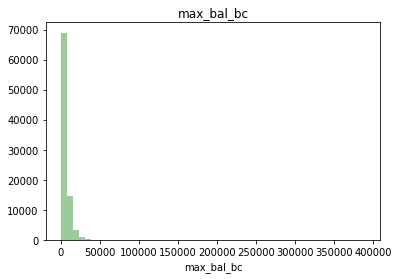

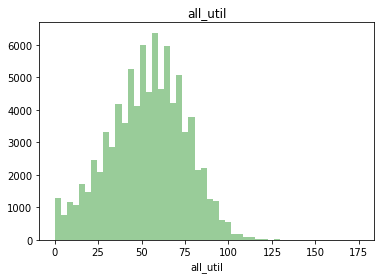

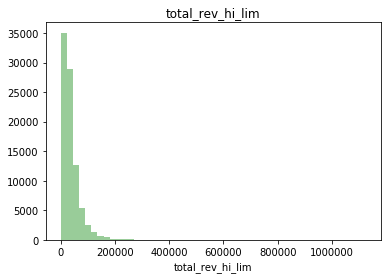

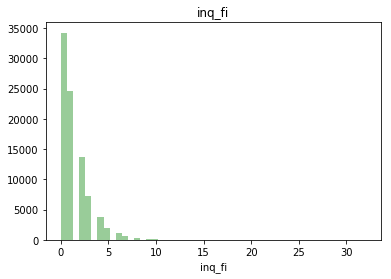

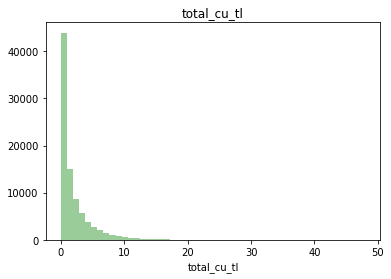

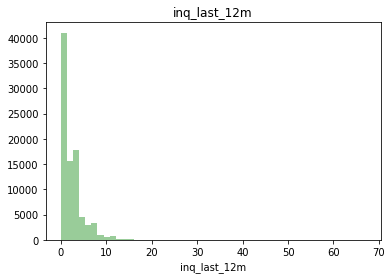

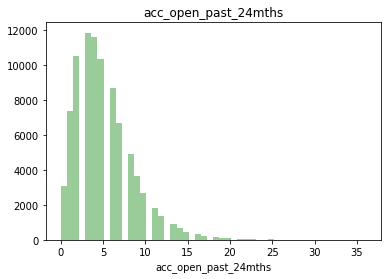

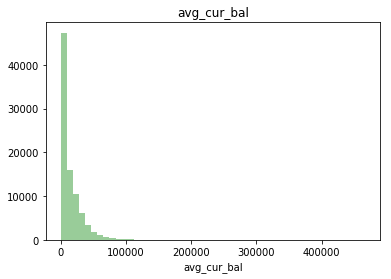

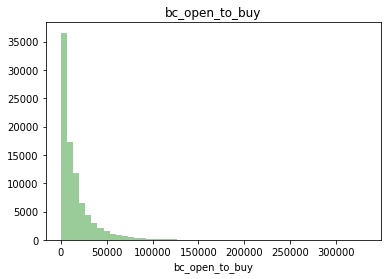

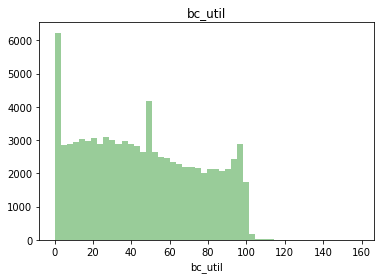

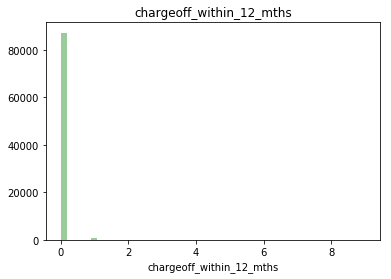

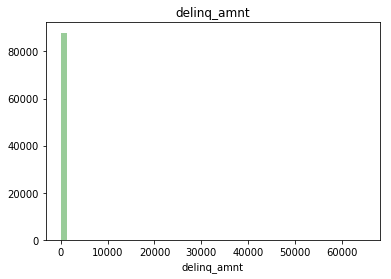

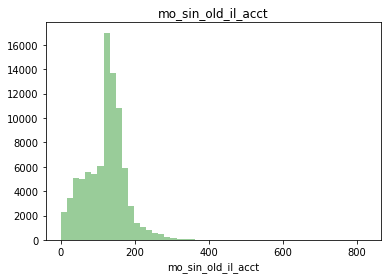

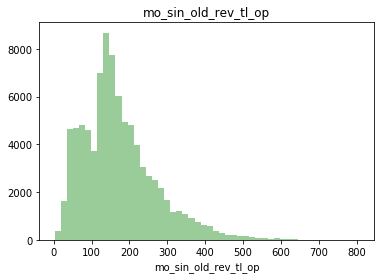

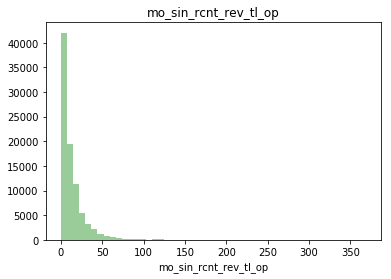

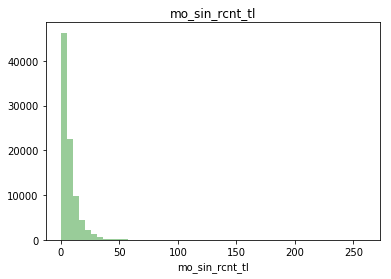

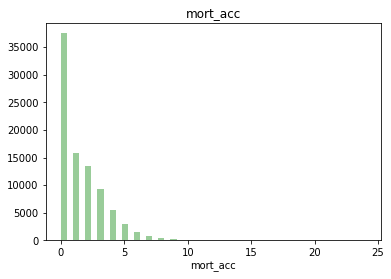

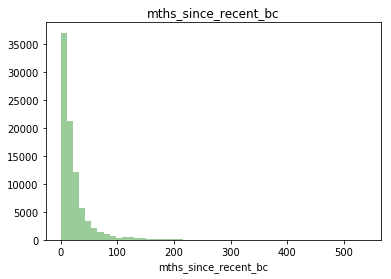

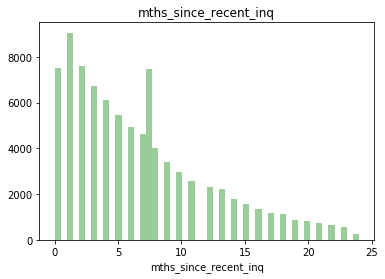

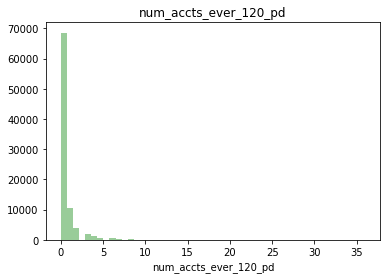

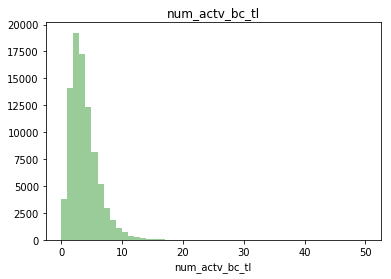

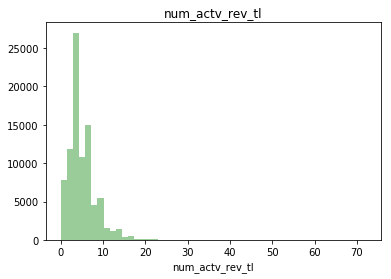

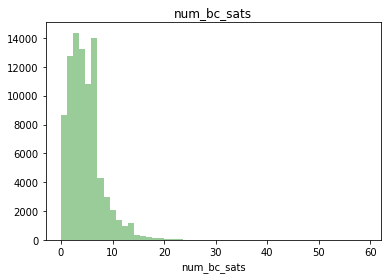

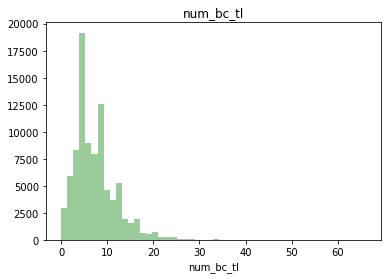

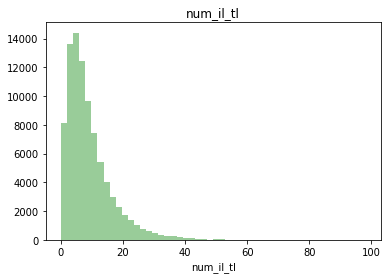

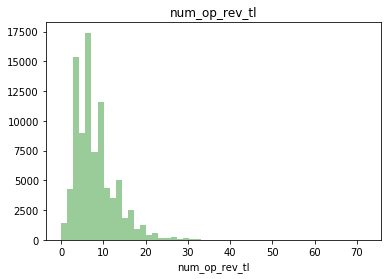

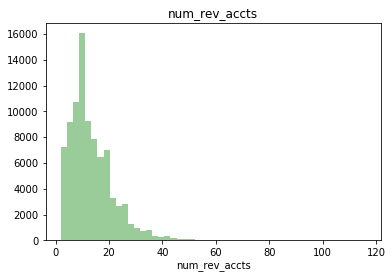

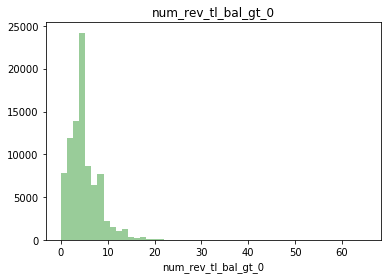

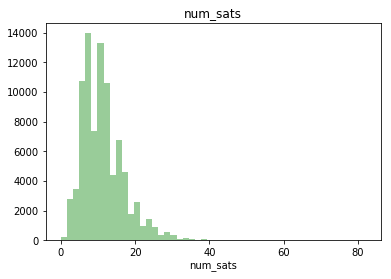

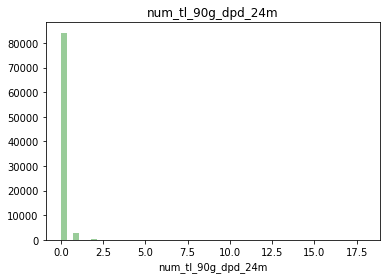

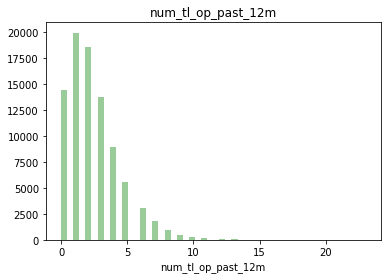

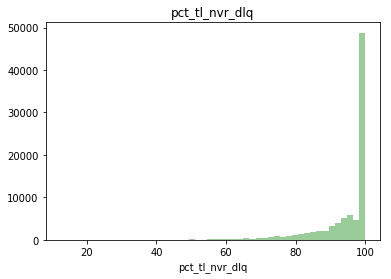

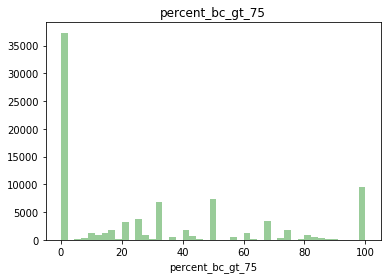

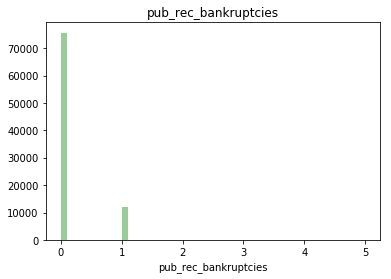

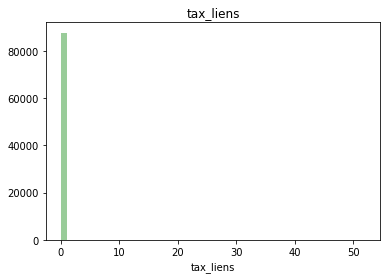

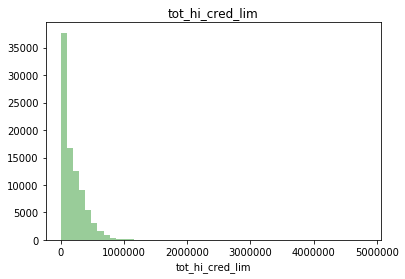

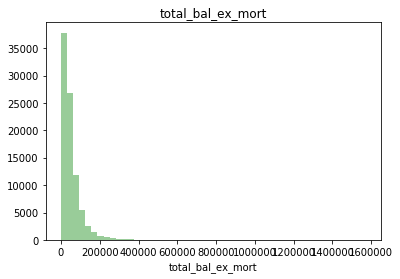

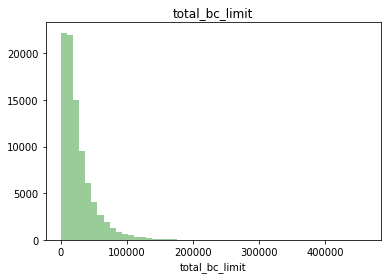

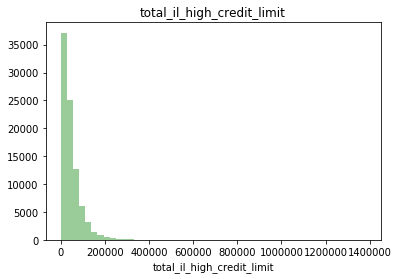

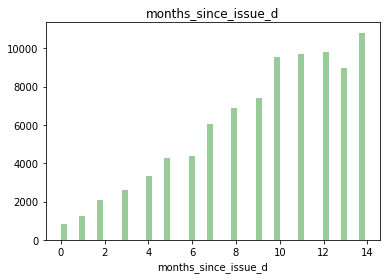

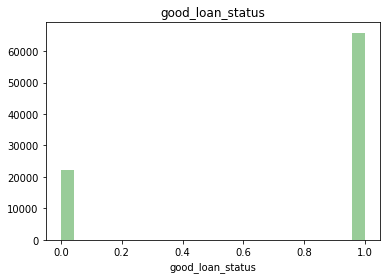

In [49]:
for var in loans_numerical:
    sns.distplot(loans[var], kde=False, color='g')
    plt.title(var)
    plt.show()

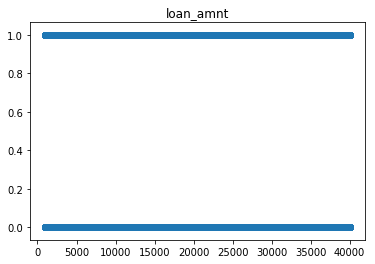

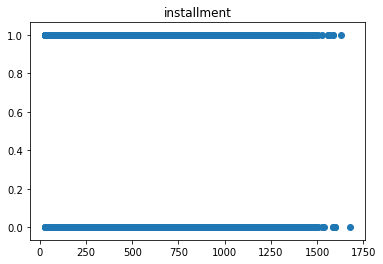

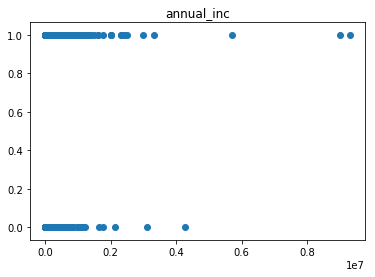

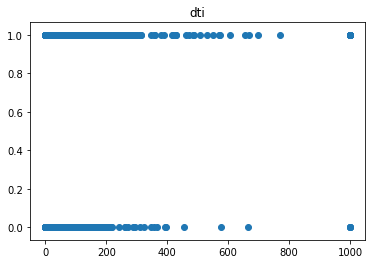

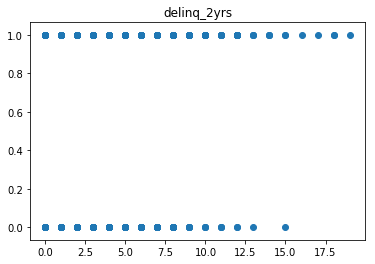

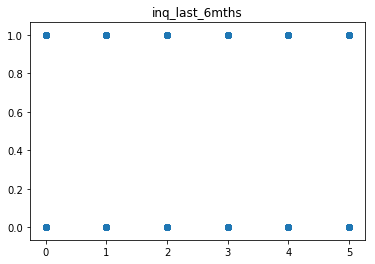

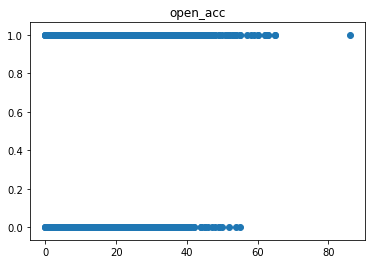

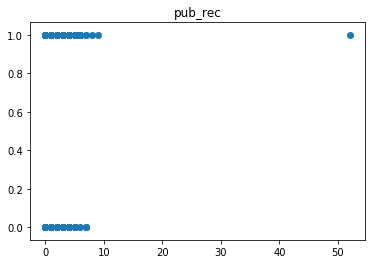

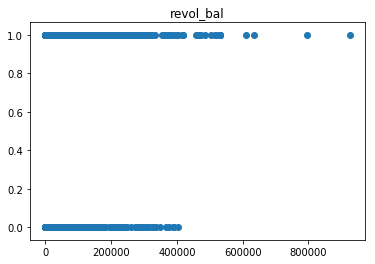

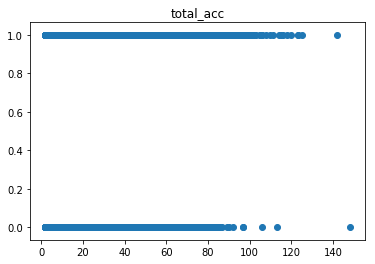

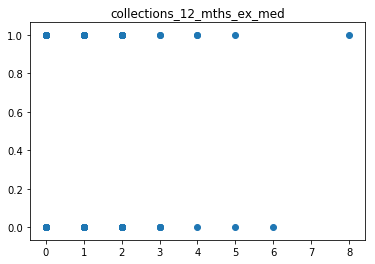

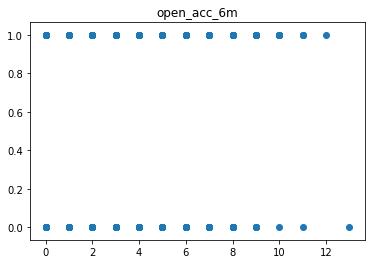

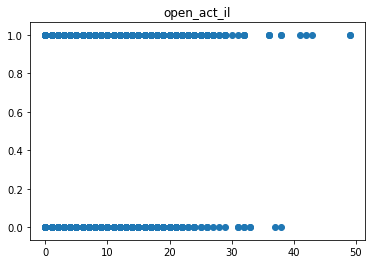

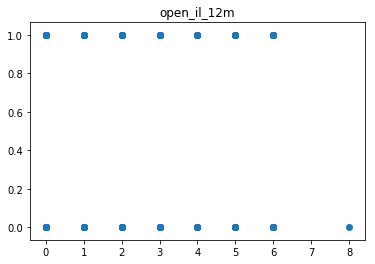

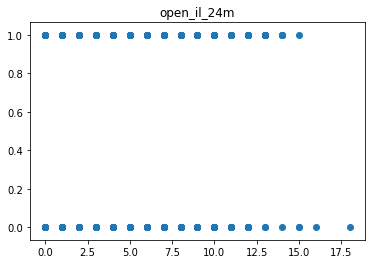

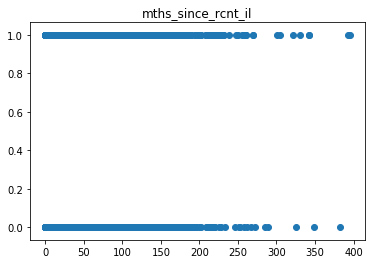

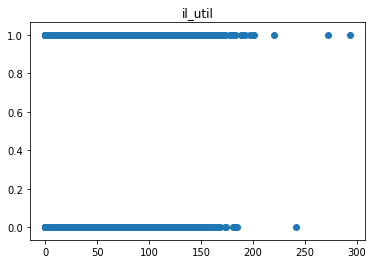

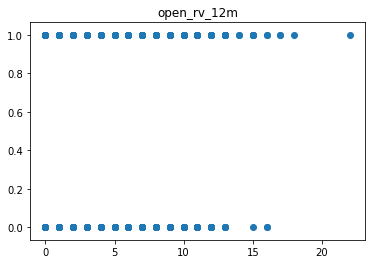

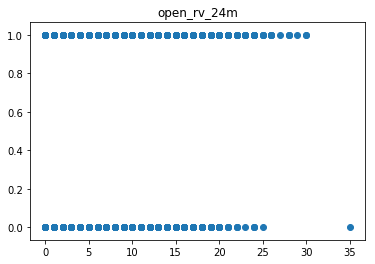

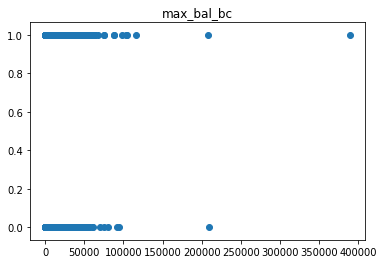

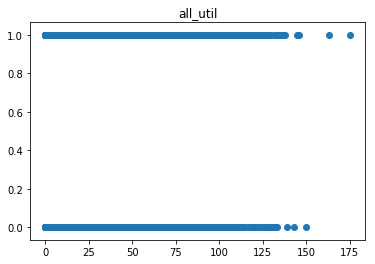

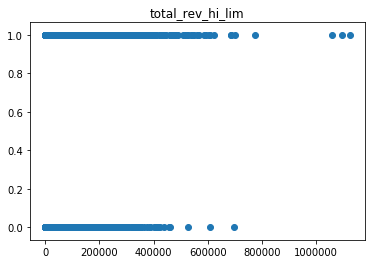

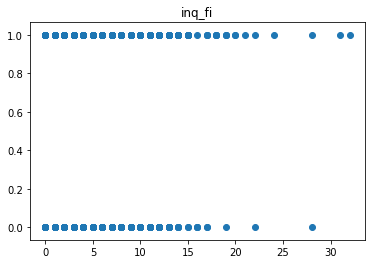

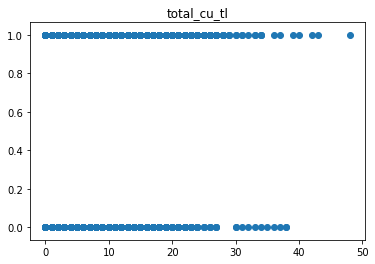

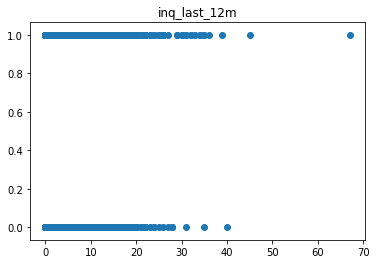

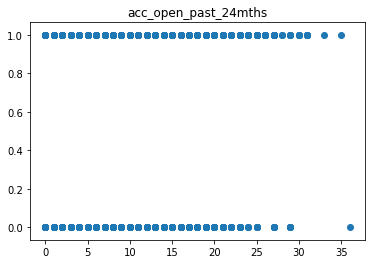

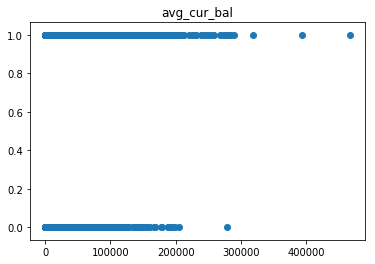

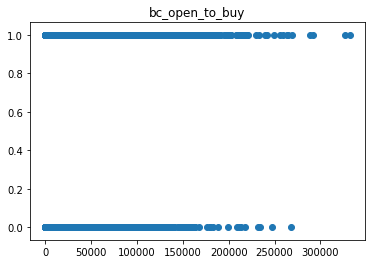

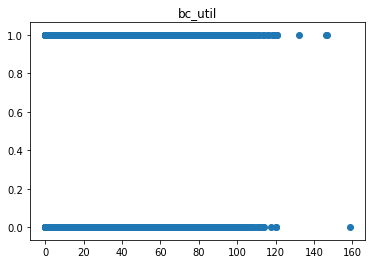

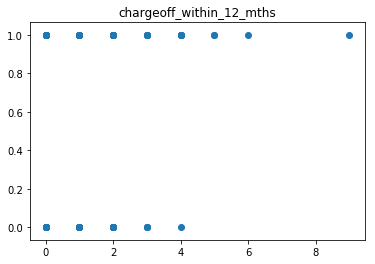

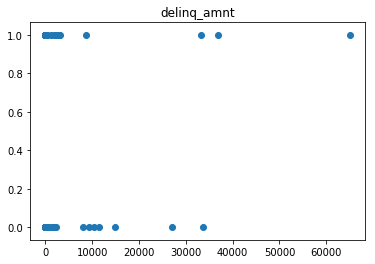

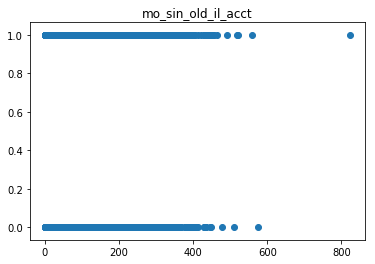

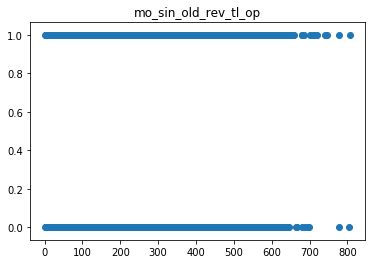

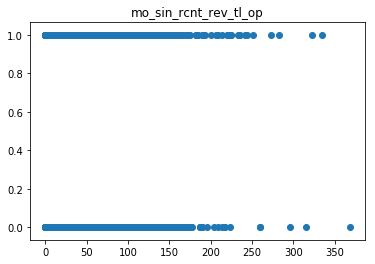

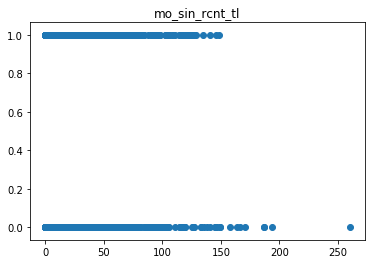

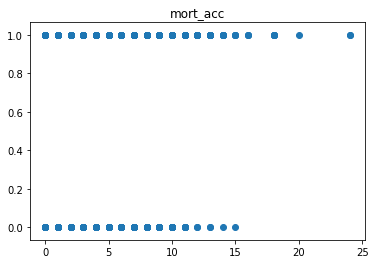

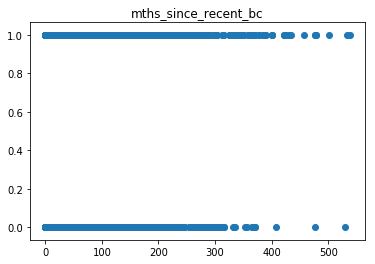

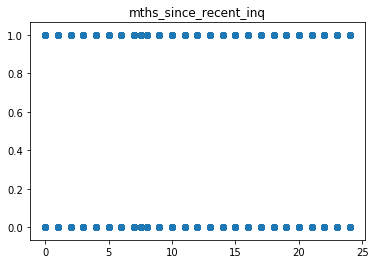

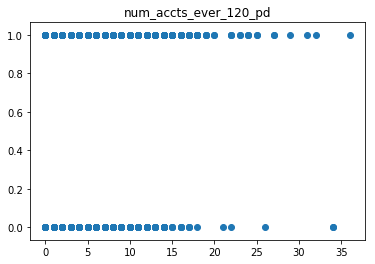

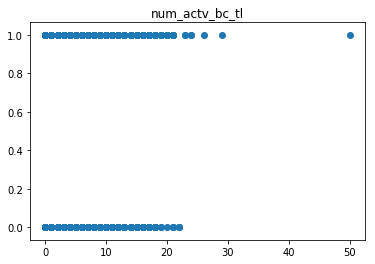

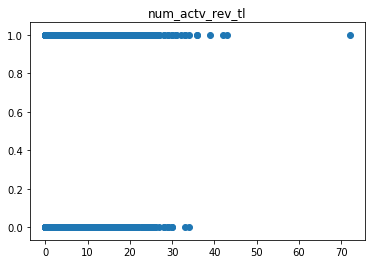

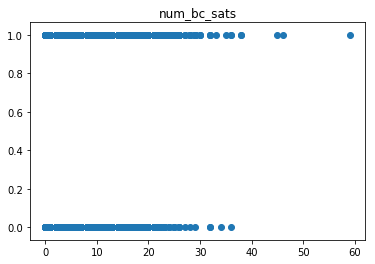

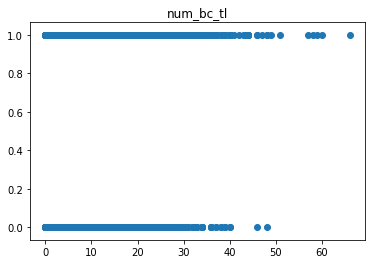

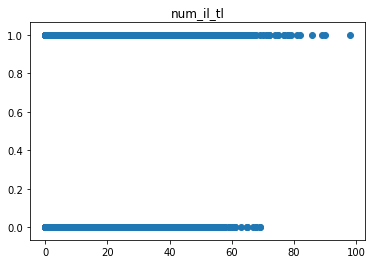

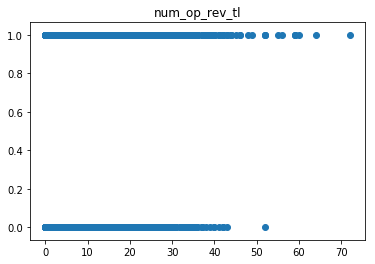

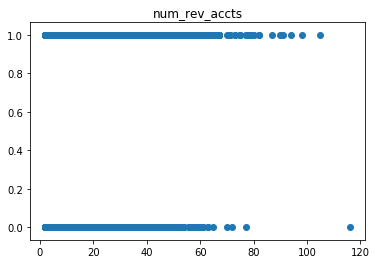

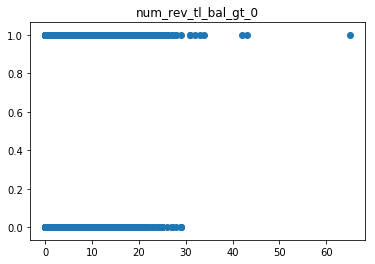

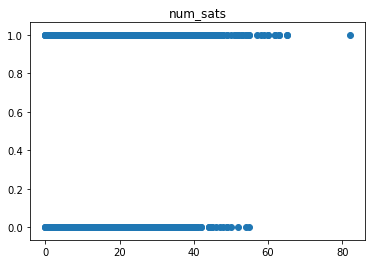

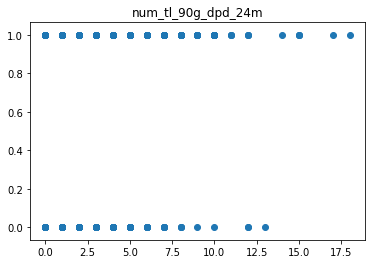

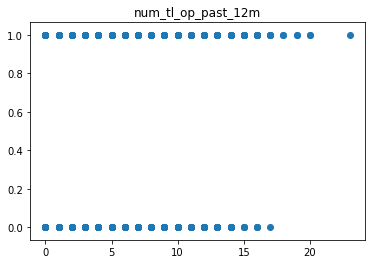

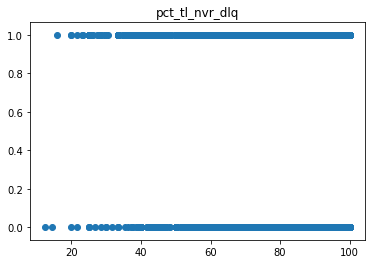

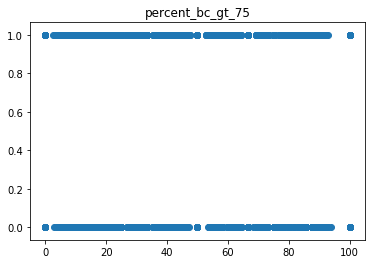

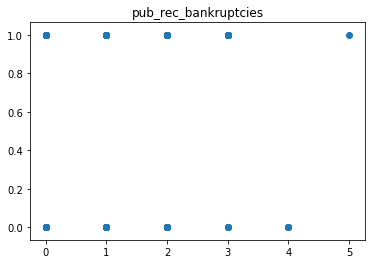

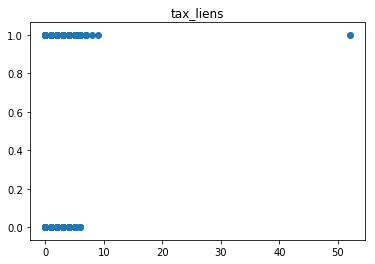

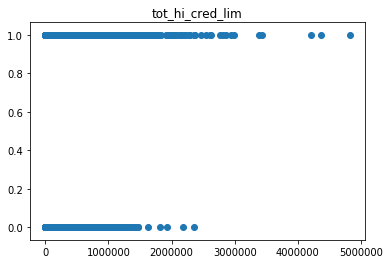

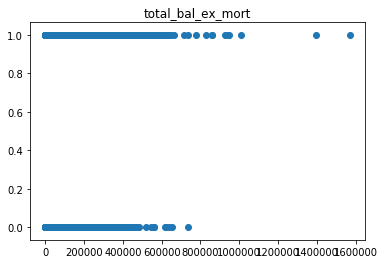

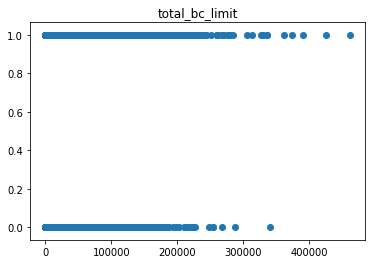

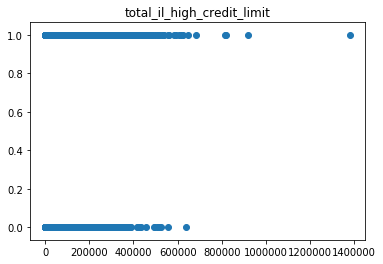

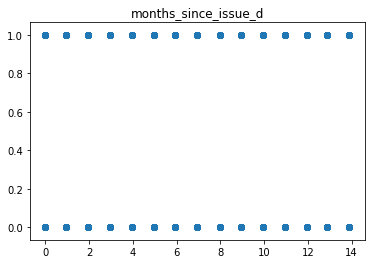

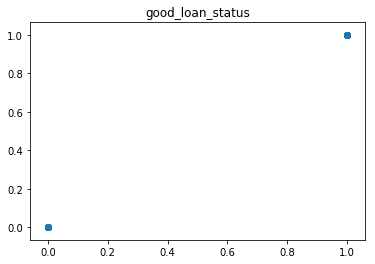

In [50]:
for var in loans_numerical:
    plt.scatter(x=loans[var], y=loans['good_loan_status'])
    plt.title(var)
    plt.show()

In [51]:
# loans_numerical.describe(percentiles=[.25,.5,.75,.90,.95,.99])

In [52]:
loans_categorical.columns

Index(['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'revol_util', 'initial_list_status', 'application_type'],
      dtype='object')

<Figure size 1008x648 with 0 Axes>

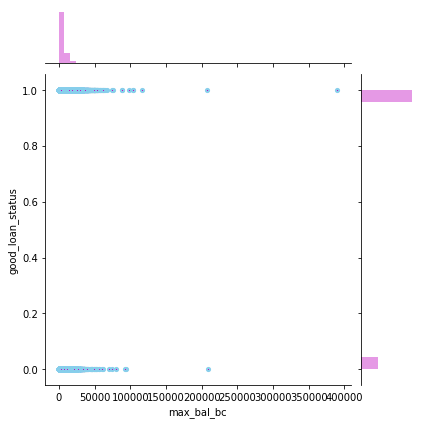

In [53]:
plt.figure(figsize=(14, 9))
sns.jointplot(x=loans["max_bal_bc"], y=loans['good_loan_status'], kind='scatter',
              s=10, color='m', edgecolor="skyblue", linewidth=2)

<Figure size 1008x648 with 0 Axes>

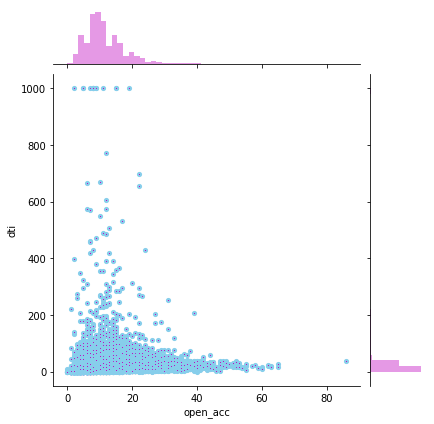

In [54]:
plt.figure(figsize=(14, 9))
sns.jointplot(x=loans["open_acc"], y=loans["dti"], kind='scatter',
              s=10, color='m', edgecolor="skyblue", linewidth=2)

<Figure size 1008x648 with 0 Axes>

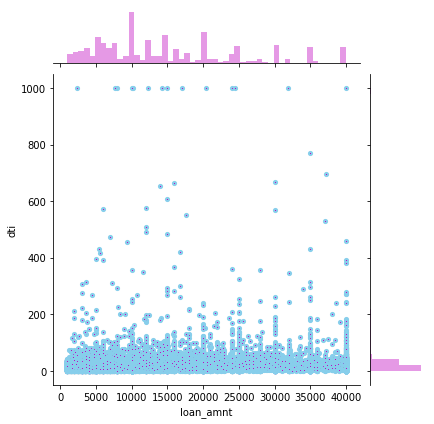

In [55]:
plt.figure(figsize=(14, 9))
sns.jointplot(x=loans["loan_amnt"], y=loans["dti"], kind='scatter',
              s=10, color='m', edgecolor="skyblue", linewidth=2)

<Figure size 1008x648 with 0 Axes>

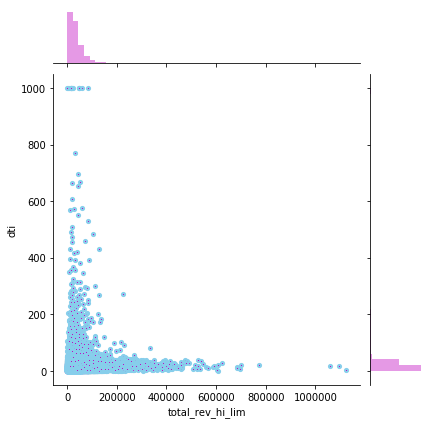

In [56]:
plt.figure(figsize=(14, 9))
sns.jointplot(x=loans["total_rev_hi_lim"], y=loans["dti"], kind='scatter',
              s=10, color='m', edgecolor="skyblue", linewidth=2)

___Loan amount and annual income comparison.  There are more 10k loans distributed than any other amount.___ 

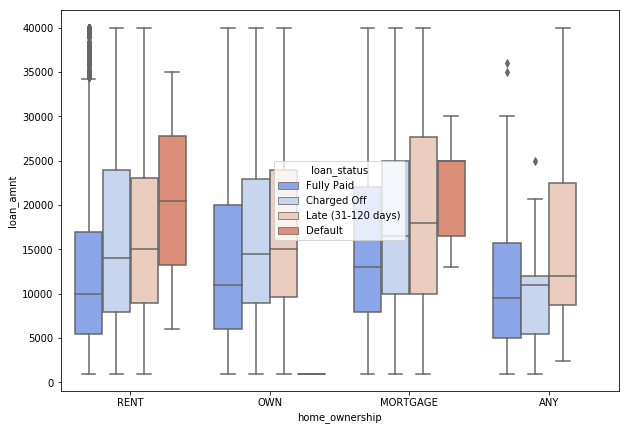

In [57]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="home_ownership", 
            y="loan_amnt",
            hue="loan_status", 
            data=loans, 
            palette="coolwarm")

In [83]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="emp_title", 
            y="loan_amnt",
            hue="loan_status", 
            data=loans, 
            palette="coolwarm")

ValueError: Could not interpret input 'loan_status'

<Figure size 720x504 with 0 Axes>

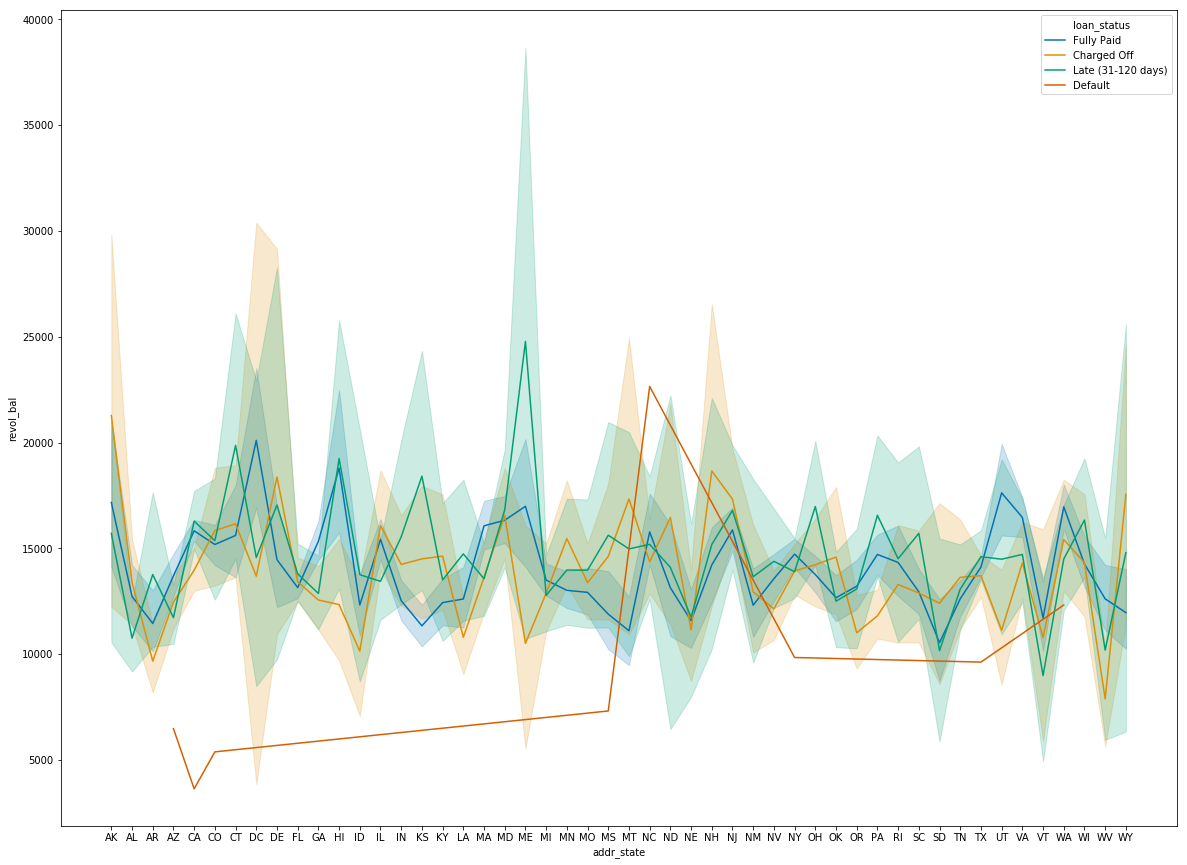

In [58]:
plt.figure(figsize=(20, 15))
sns.lineplot(x="addr_state", 
             y="revol_bal",
             hue="loan_status", 
             data=loans, 
             palette="colorblind")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

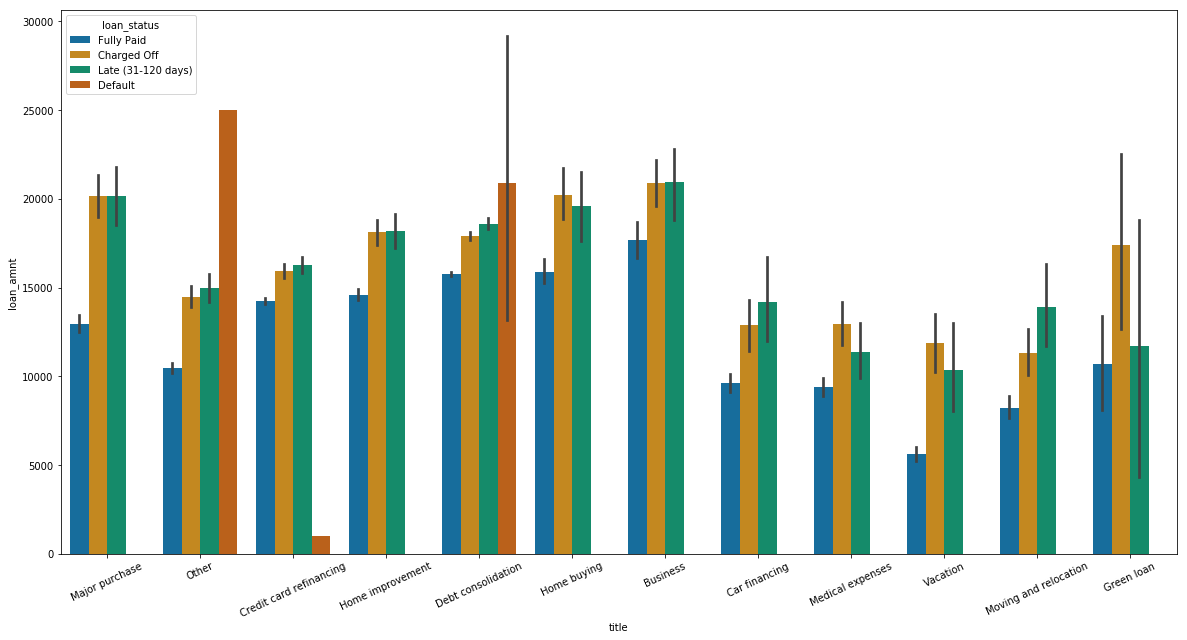

In [59]:
plt.figure(figsize=(20, 10))
sns.barplot(x="title",
            y="loan_amnt",
            hue="loan_status",
            data=loans,
            palette="colorblind")
plt.xticks(rotation=25)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

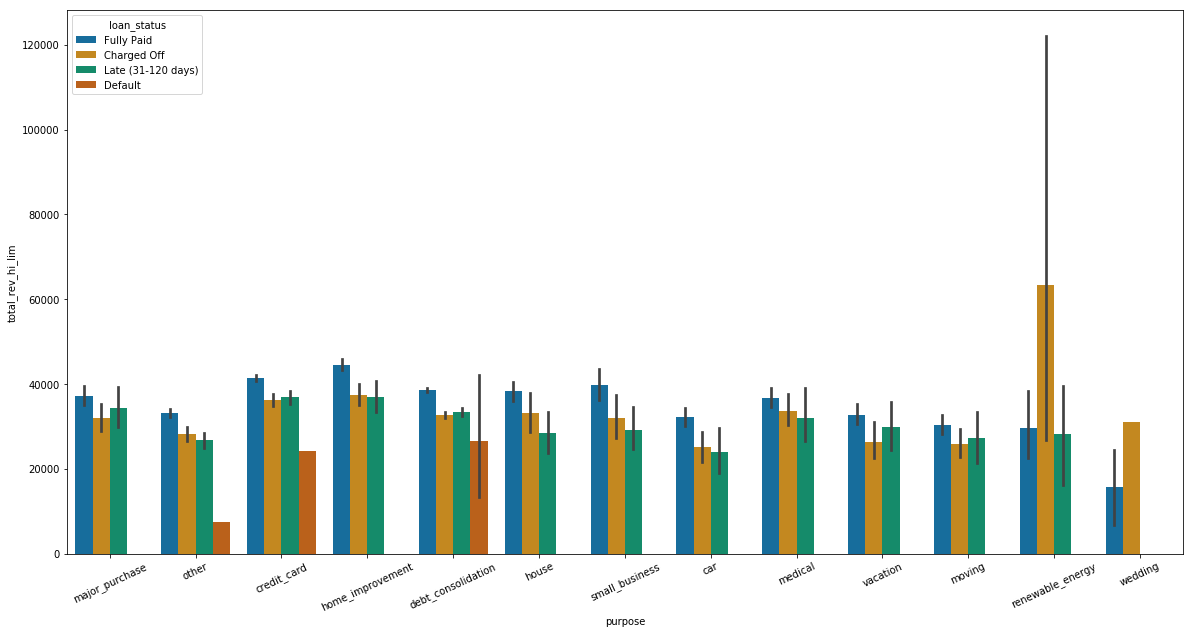

In [60]:
plt.figure(figsize=(20, 10))
sns.barplot(x="purpose",
            y="total_rev_hi_lim",
            hue="loan_status",
            data=loans,
            palette="colorblind")
plt.xticks(rotation=25)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

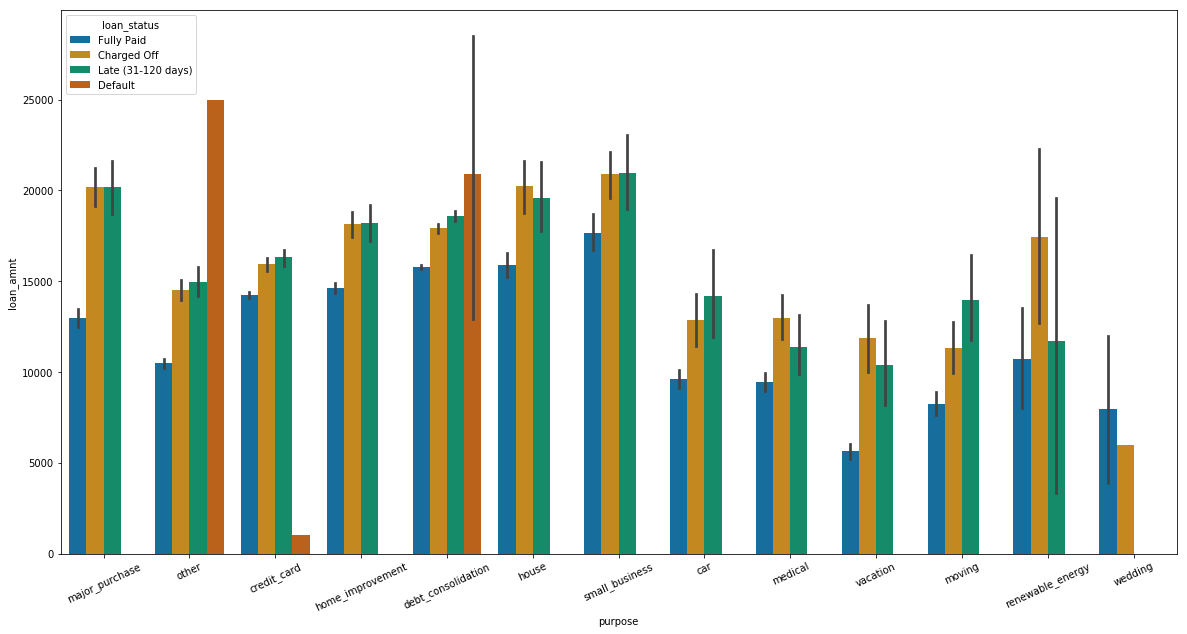

In [61]:
plt.figure(figsize=(20, 10))
sns.barplot(x="purpose",
            y="loan_amnt",
            hue="loan_status",
            data=loans,
            palette="colorblind")
plt.xticks(rotation=25)

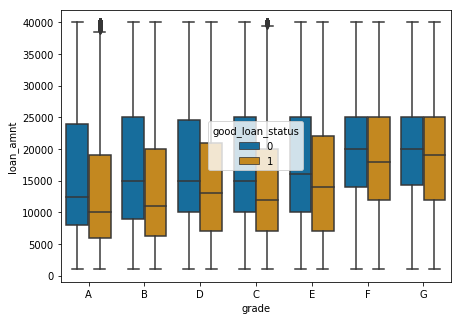

In [62]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="grade", 
            y="loan_amnt", 
            hue="good_loan_status",
            data=loans, 
            palette="colorblind")

___This is what to be expected, the larger the loan the longer the term to pay it back.___

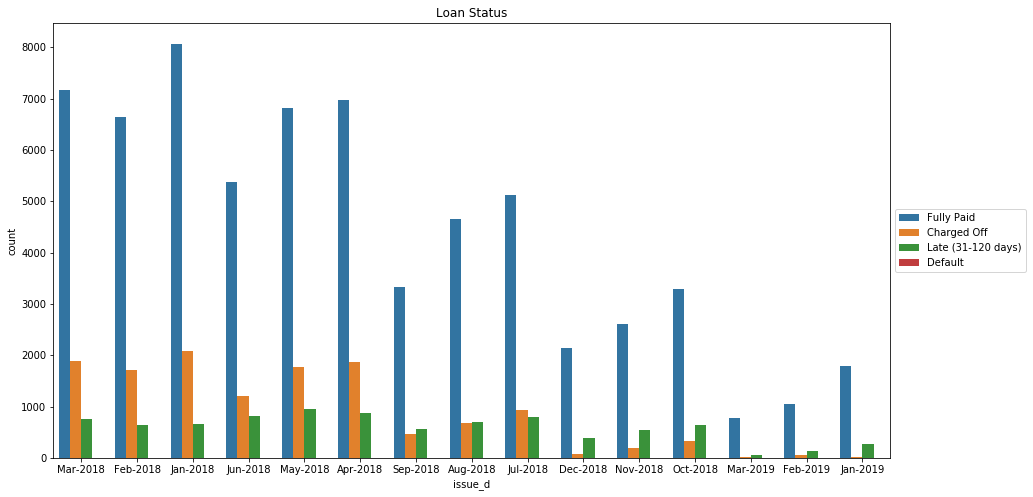

In [63]:
plt.figure(figsize=(15, 8))
sns.countplot(x='issue_d',
              hue='loan_status', 
              data=loans)
plt.title('Loan Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

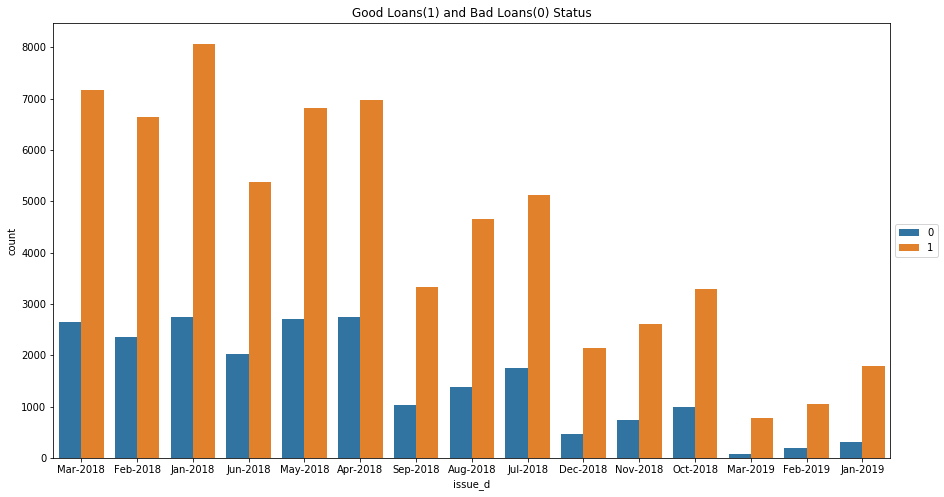

In [64]:
plt.figure(figsize=(15, 8))
sns.countplot(x='issue_d', hue='good_loan_status', data=loans)
plt.title('Good Loans(1) and Bad Loans(0) Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


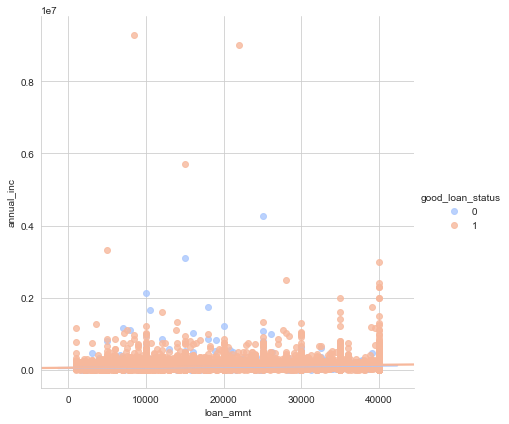

In [65]:
sns.set_style('whitegrid')
sns.lmplot('loan_amnt', 
           'annual_inc', 
           data=loans, 
           hue='good_loan_status',
           palette='coolwarm', 
           size=6, 
           aspect=1, 
           fit_reg=True)

In [66]:
#plt.figure(figsize=(40, 40))
#corr = loans.iloc[:, 1:].corr()
# corr

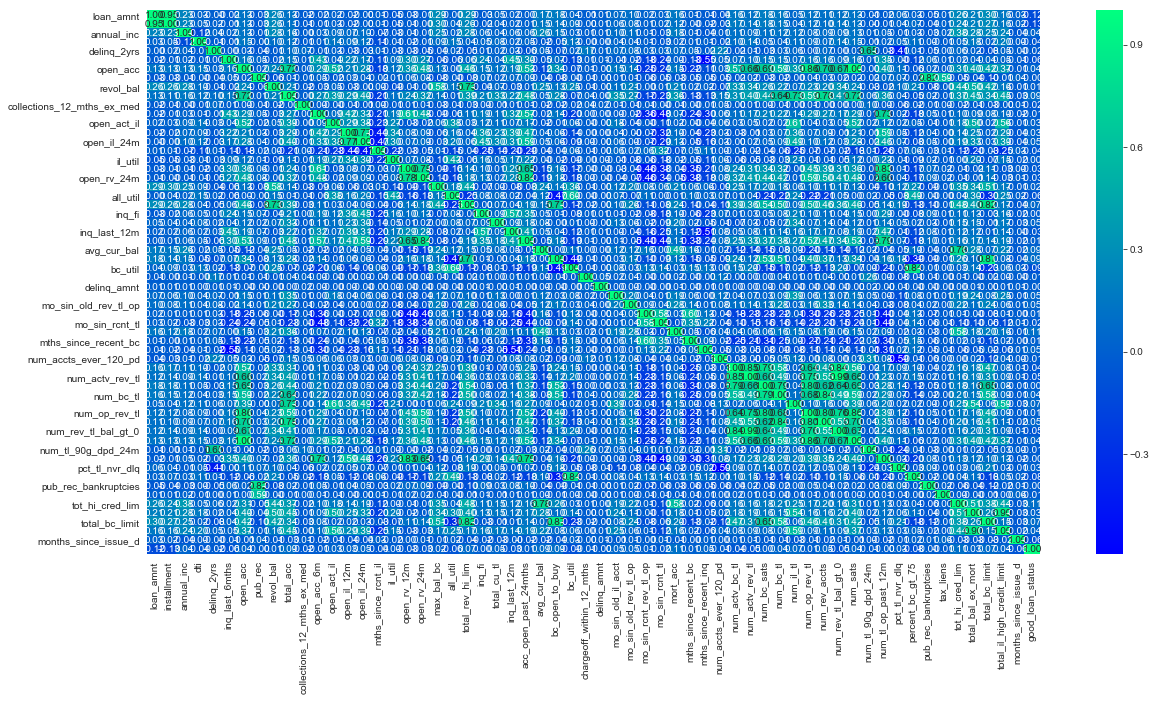

In [67]:
# Is there collinearity?
plt.figure(figsize=(20, 10))
sns.heatmap(data=loans_numerical.corr(),
            cmap="winter", 
            fmt=".2f", 
            annot=True)

In [68]:
'''def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(
        np.tril(np.ones([len(df_corr)]*2,
                        dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out


trimm_correlated(loans, 10)'''

"def trimm_correlated(df_in, threshold):\n    df_corr = df_in.corr(method='pearson', min_periods=1)\n    df_not_correlated = ~(df_corr.mask(\n        np.tril(np.ones([len(df_corr)]*2,\n                        dtype=bool))).abs() > threshold).any()\n    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index\n    df_out = df_in[un_corr_idx]\n    return df_out\n\n\ntrimm_correlated(loans, 10)"

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


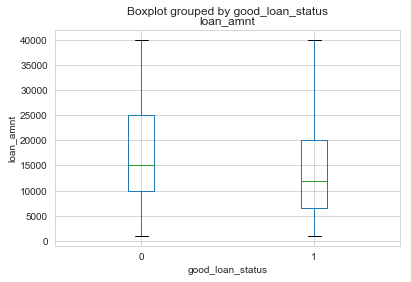

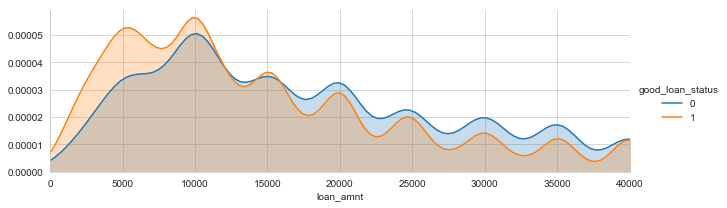

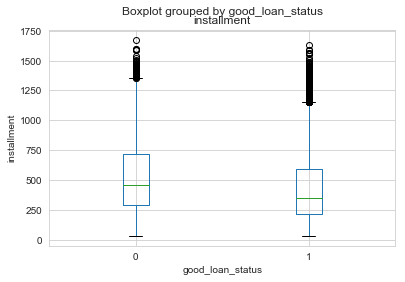

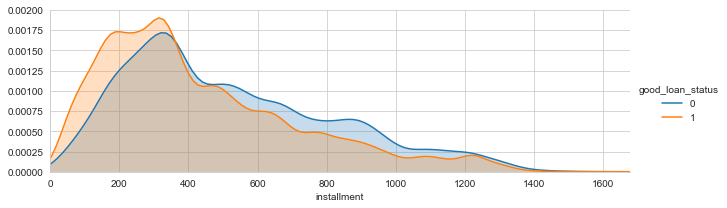

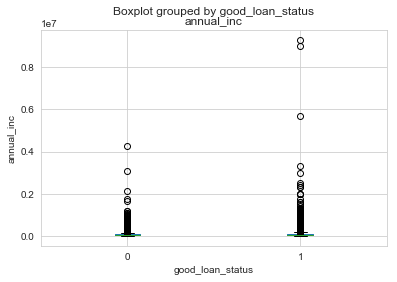

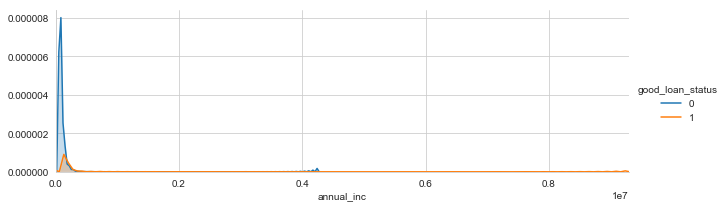

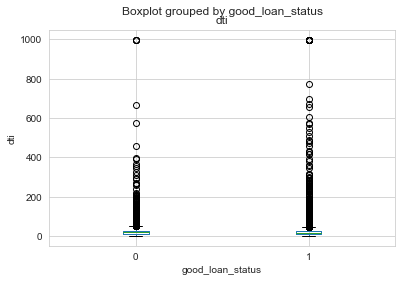

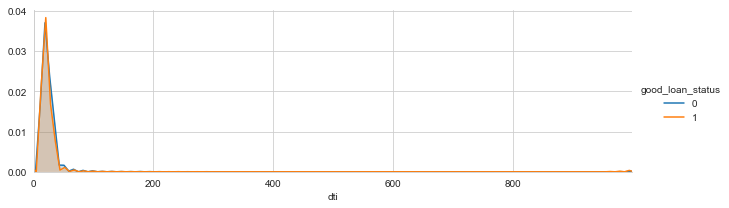

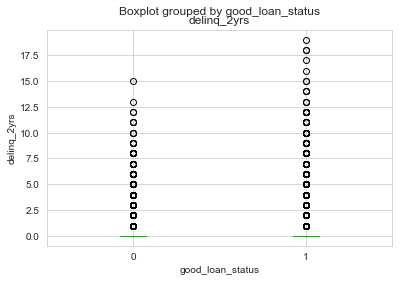

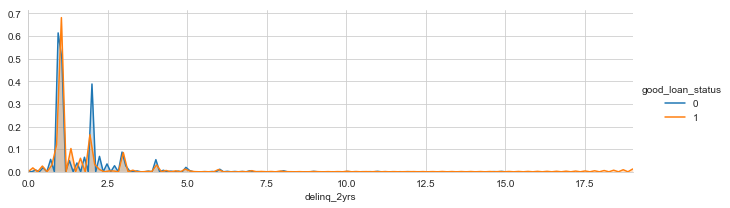

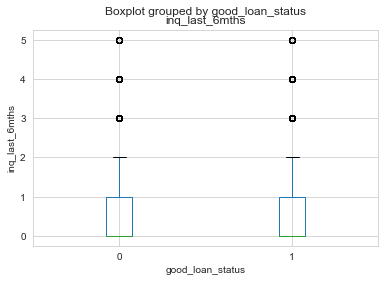

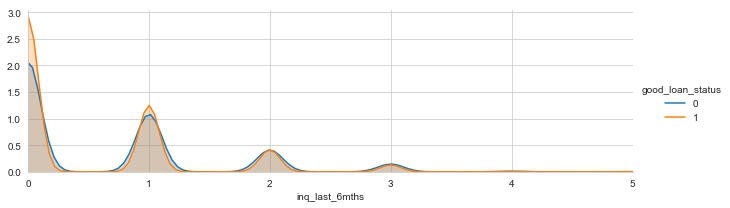

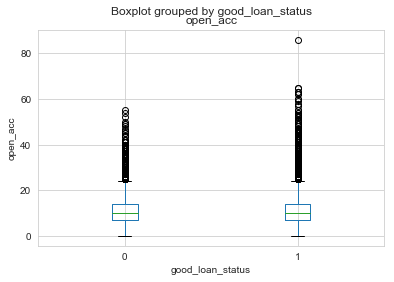

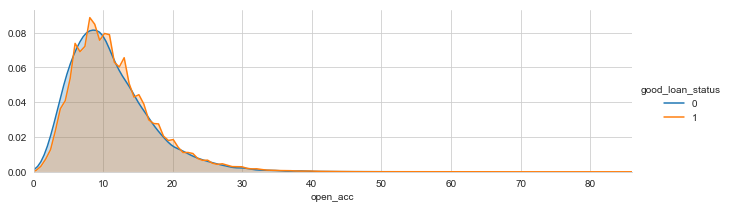

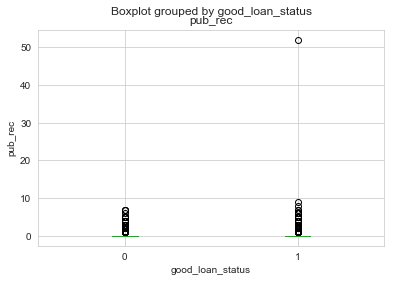

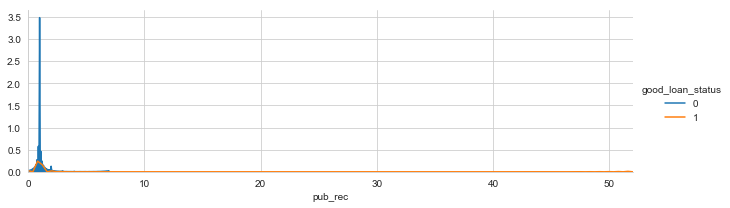

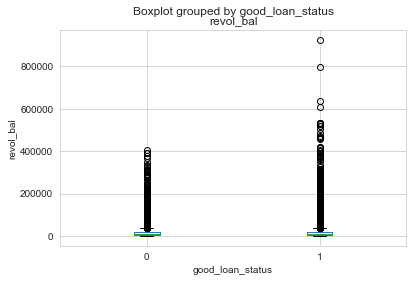

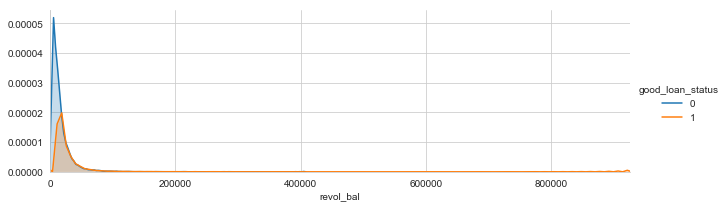

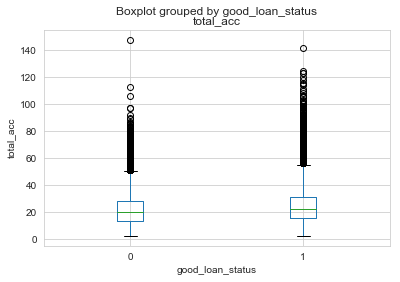

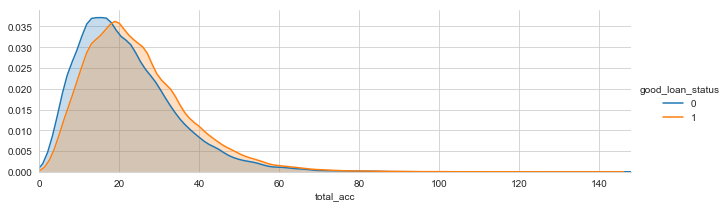

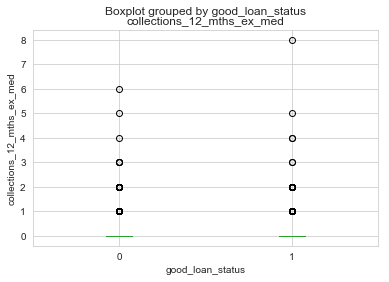

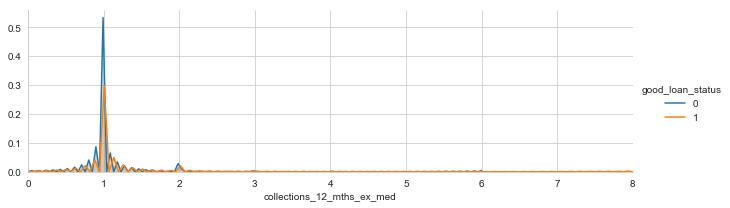

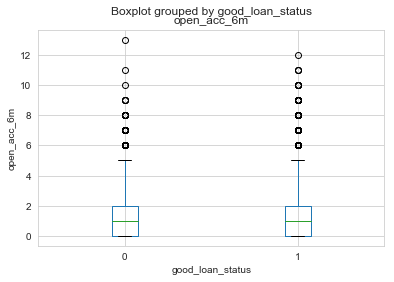

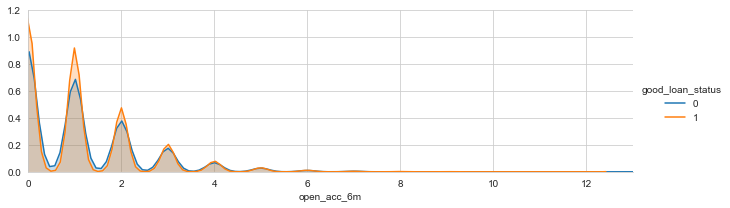

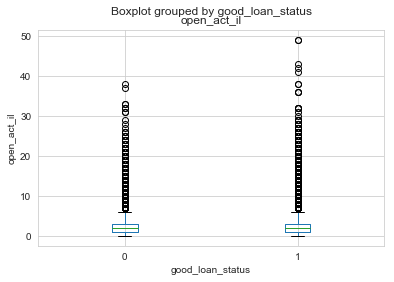

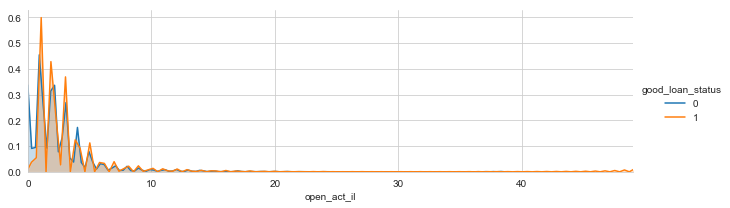

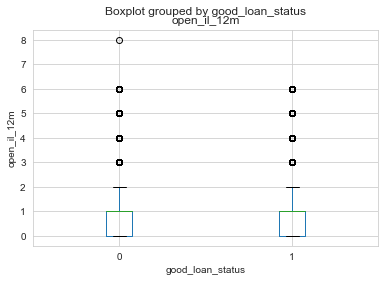

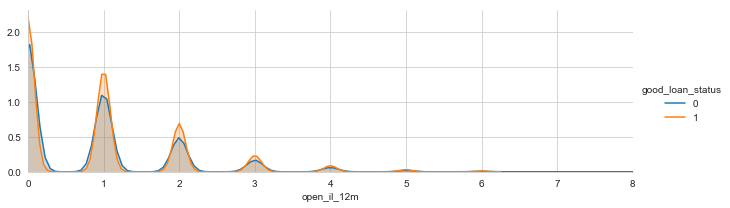

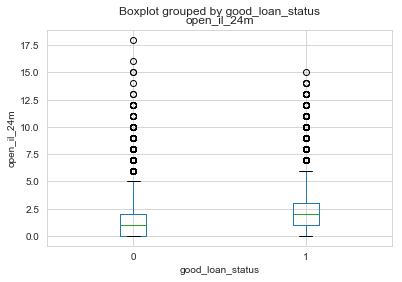

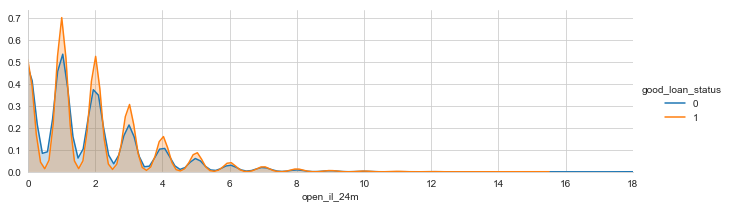

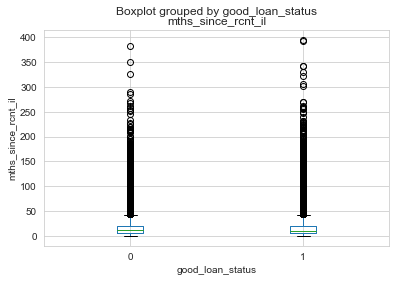

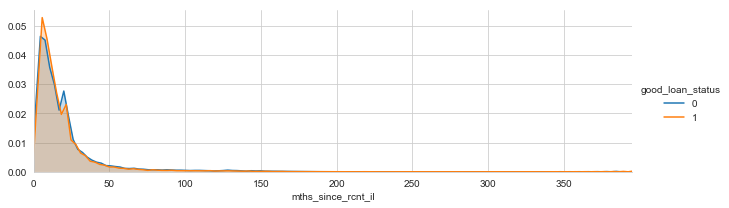

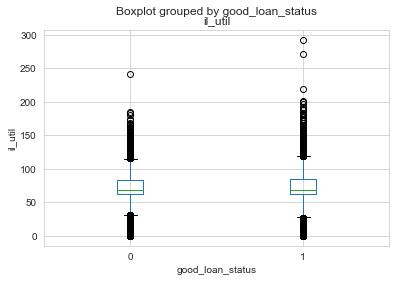

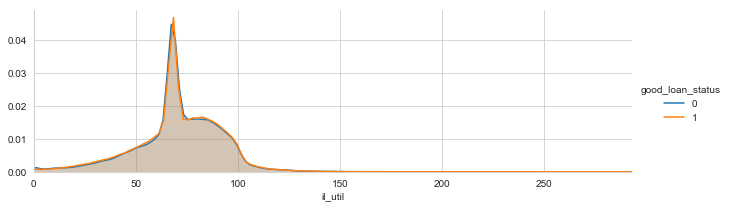

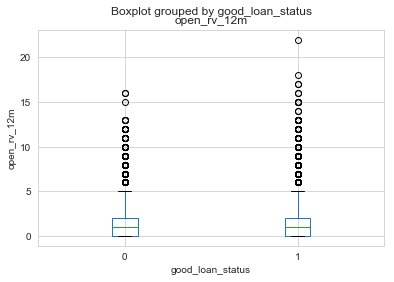

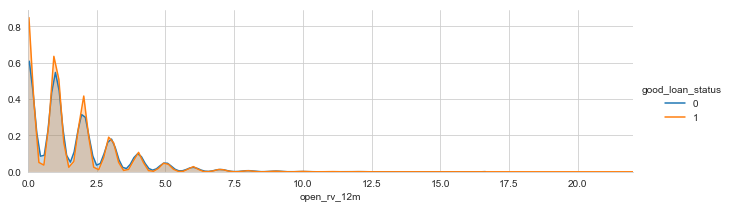

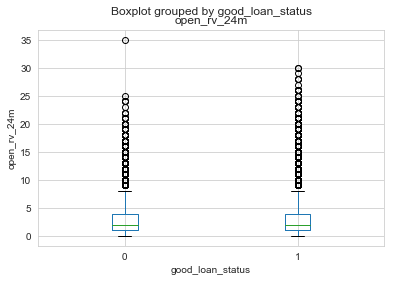

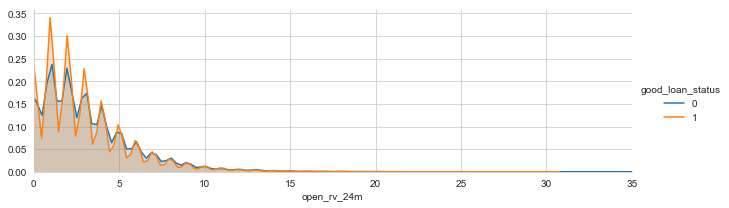

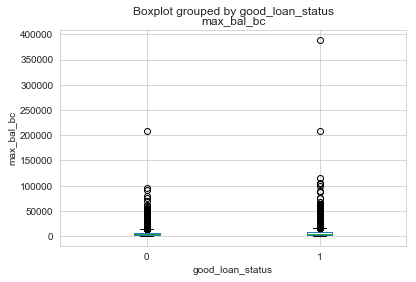

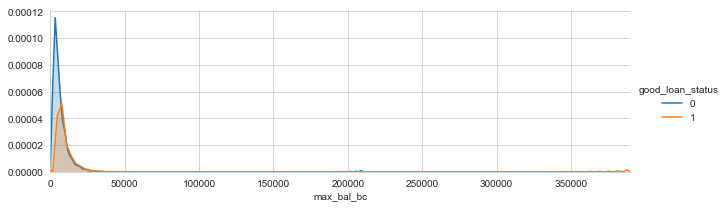

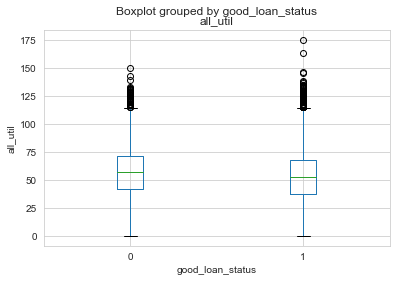

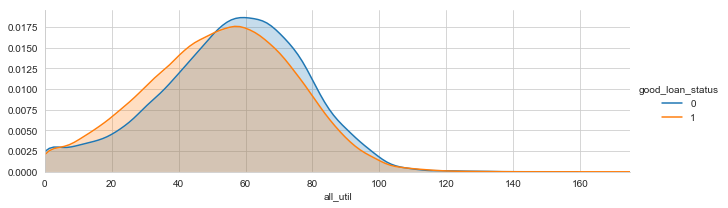

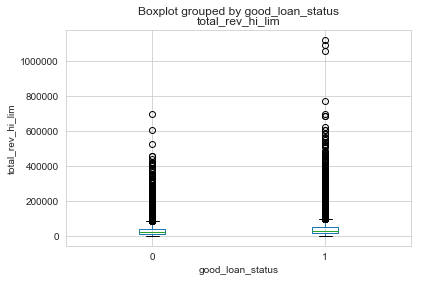

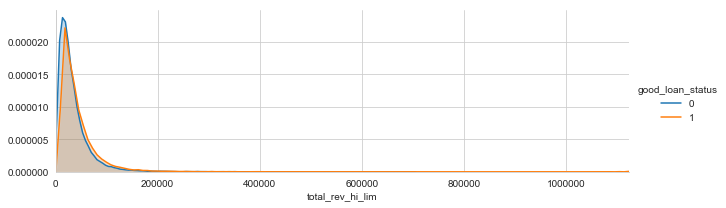

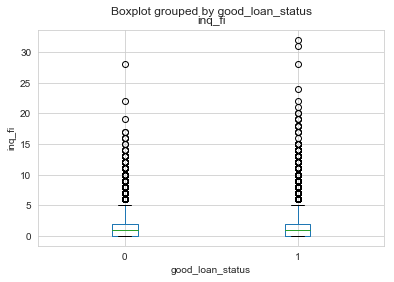

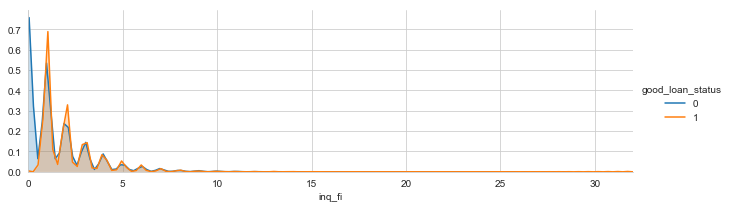

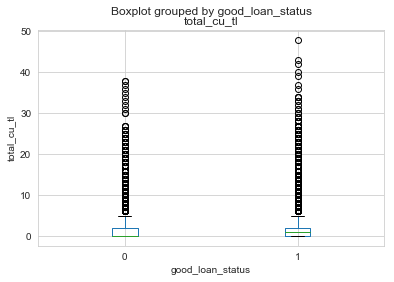

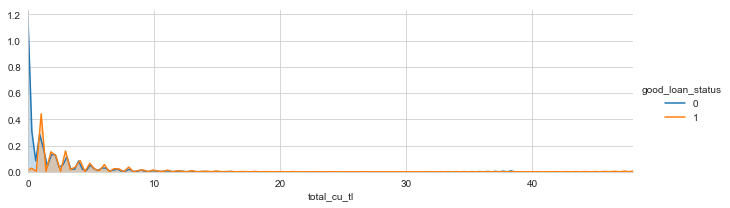

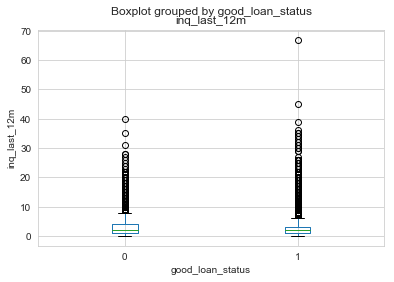

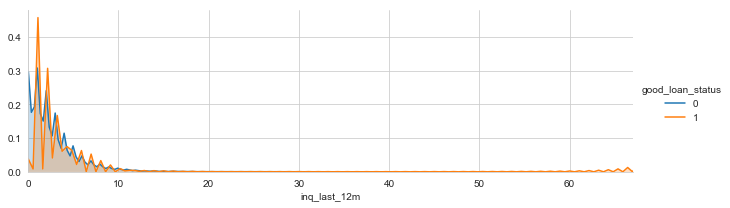

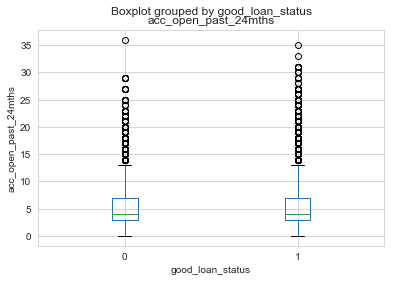

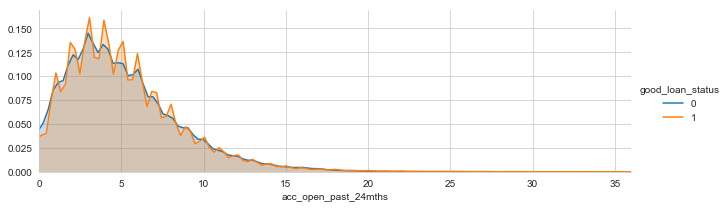

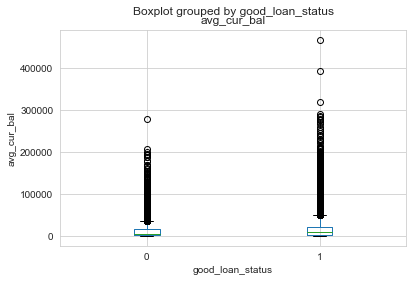

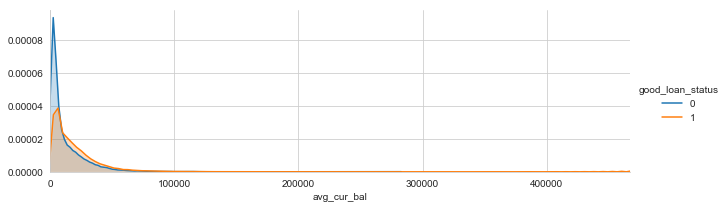

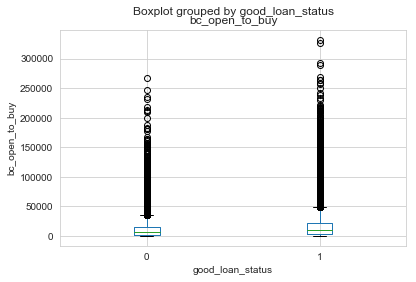

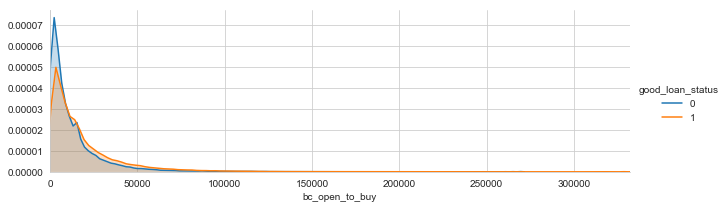

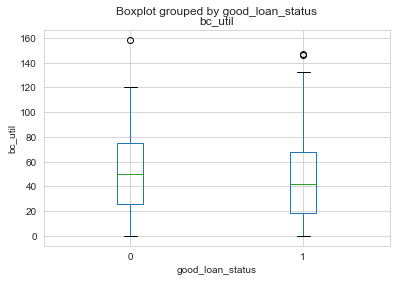

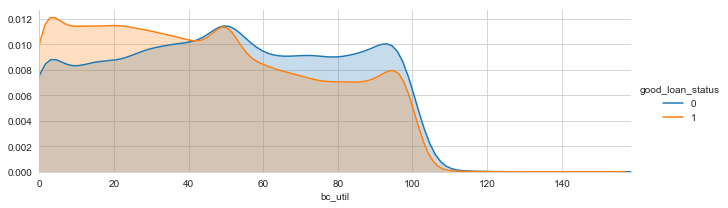

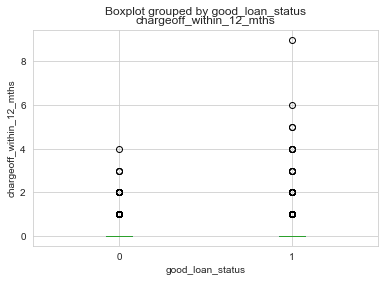

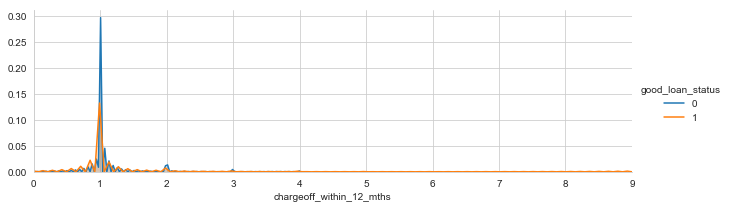

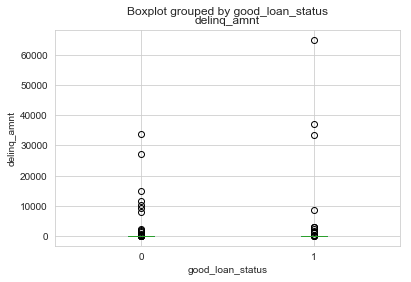

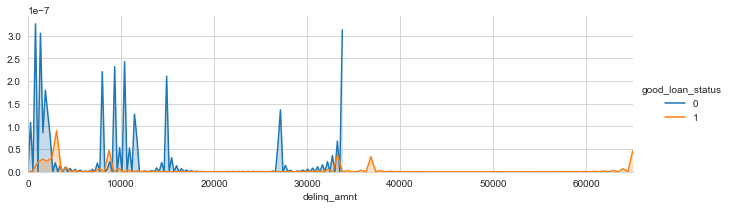

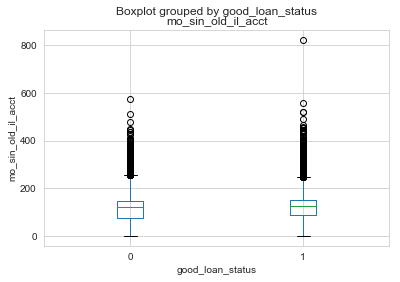

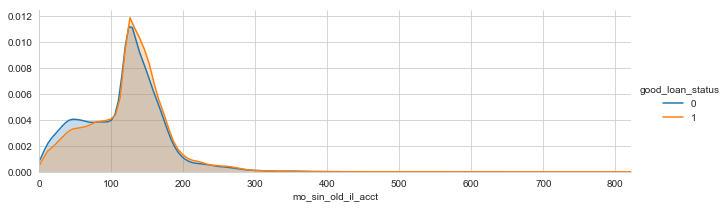

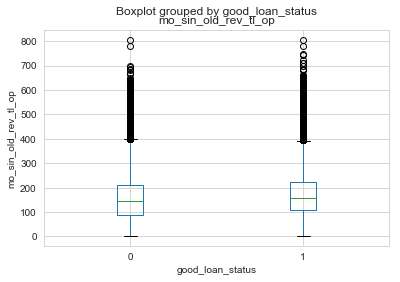

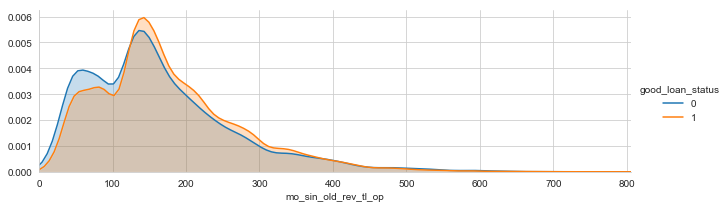

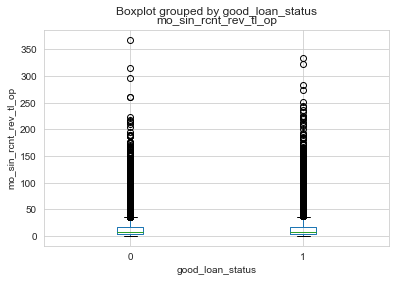

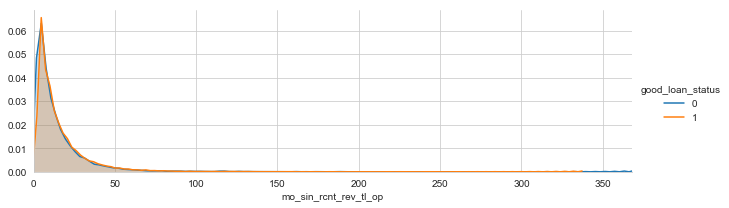

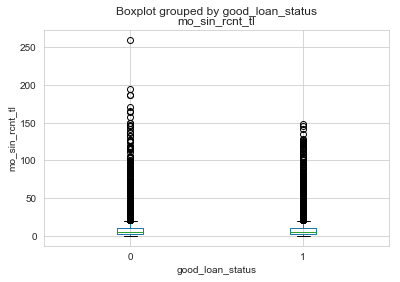

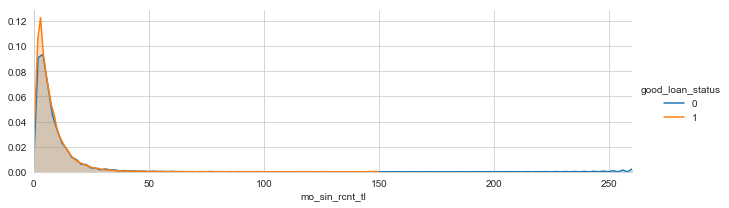

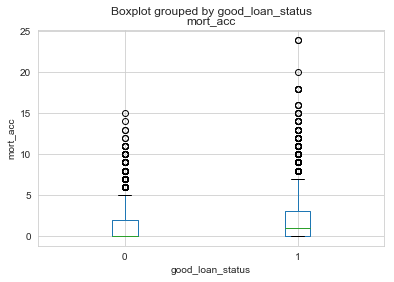

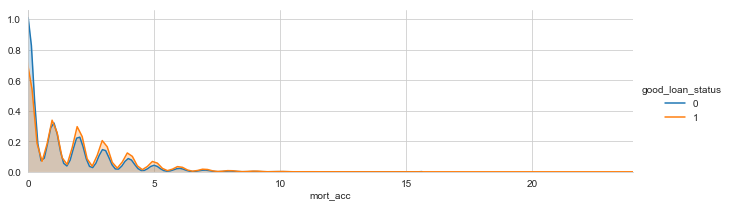

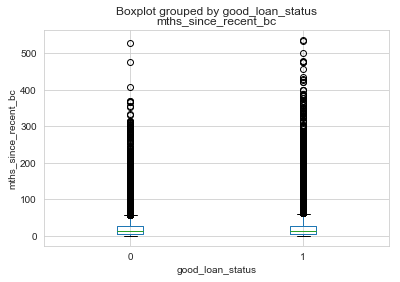

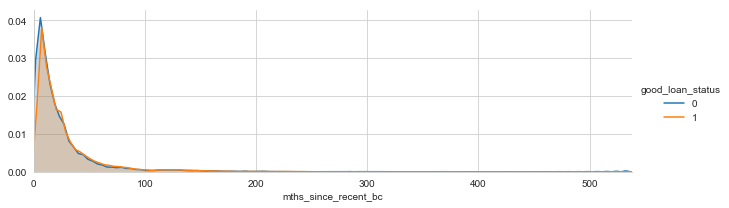

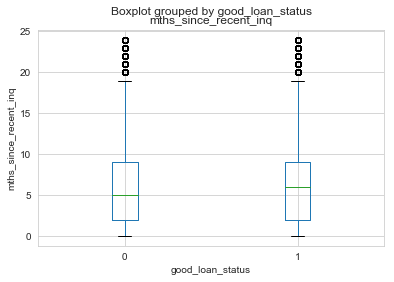

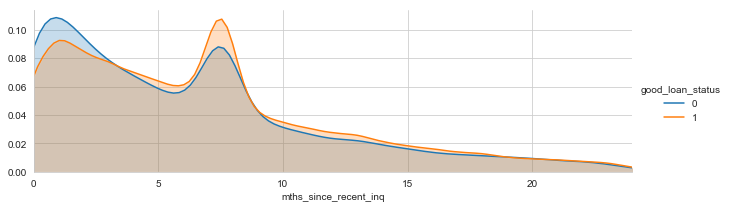

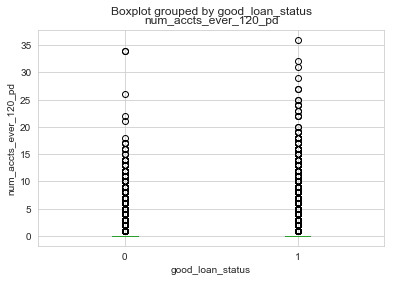

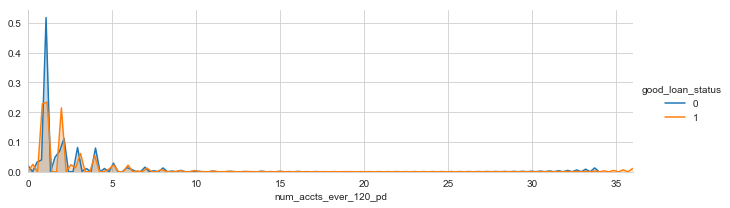

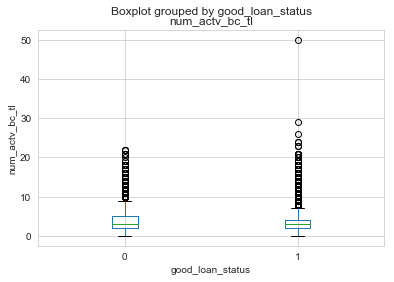

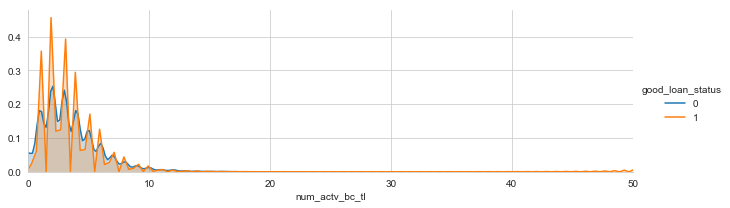

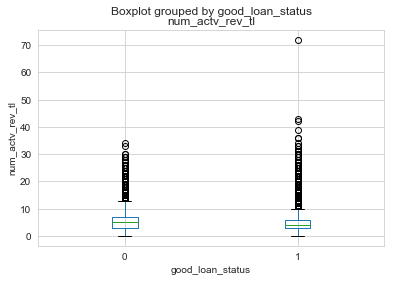

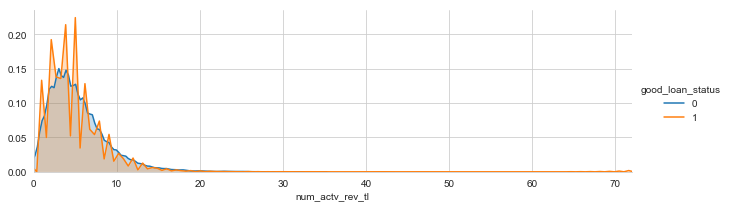

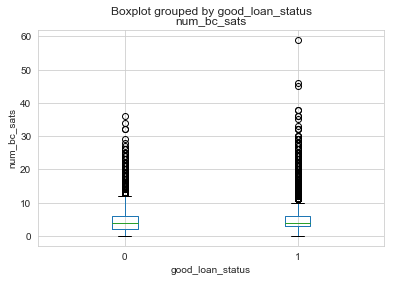

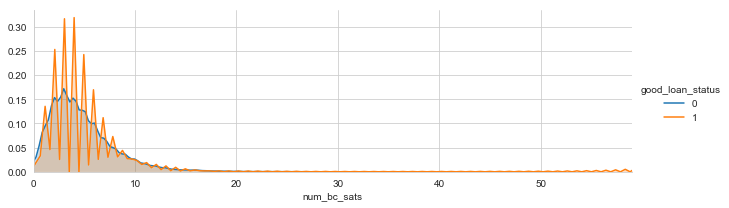

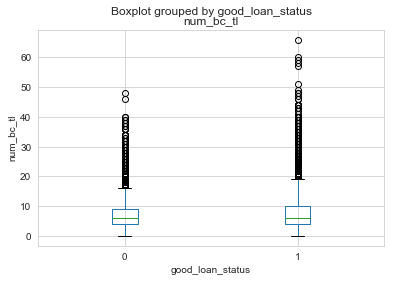

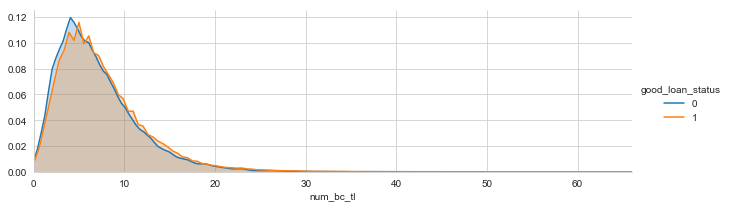

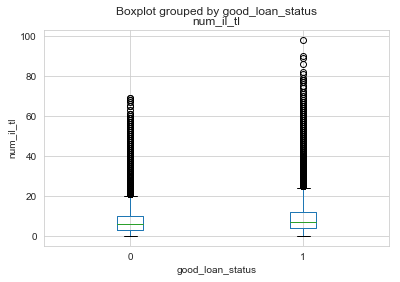

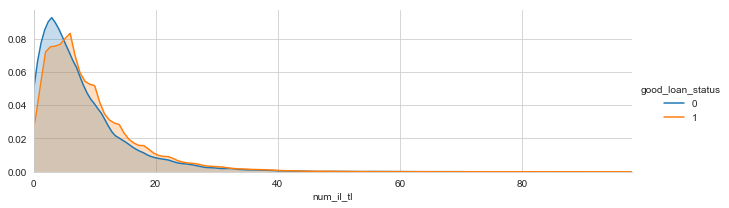

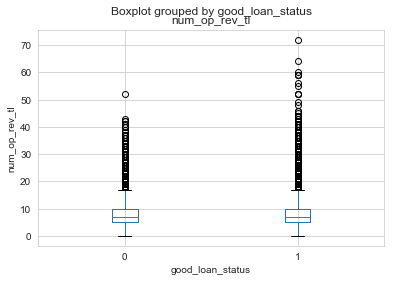

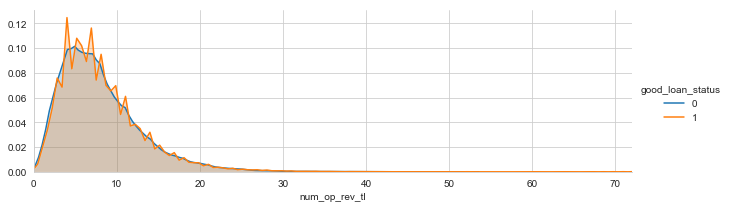

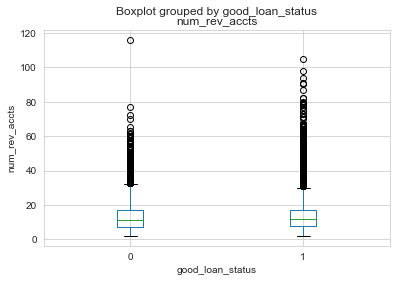

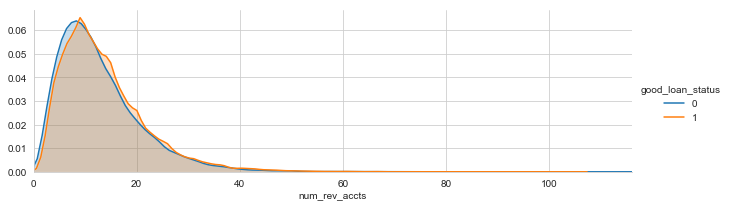

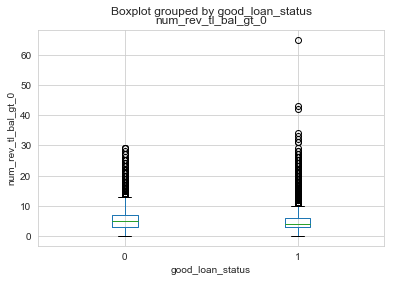

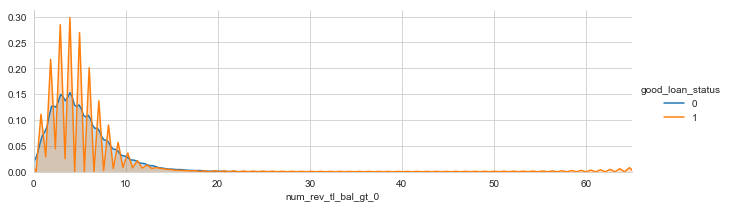

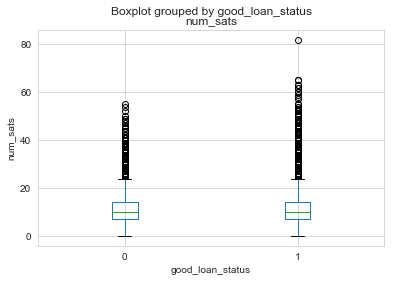

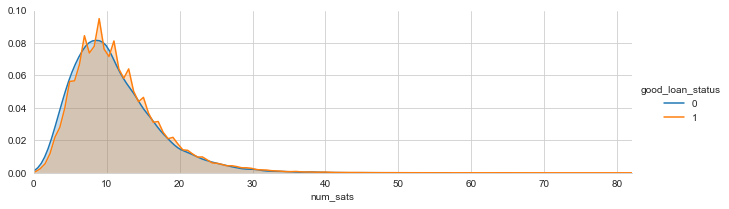

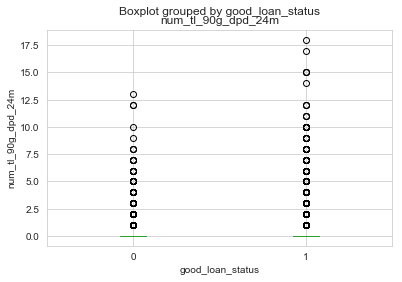

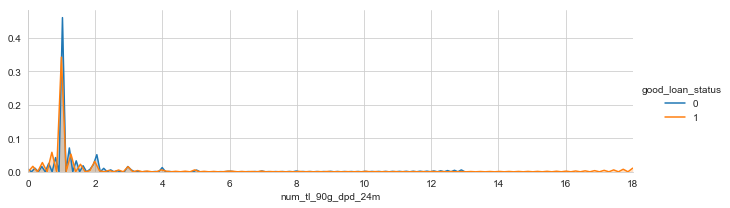

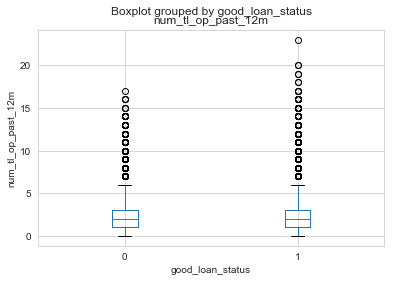

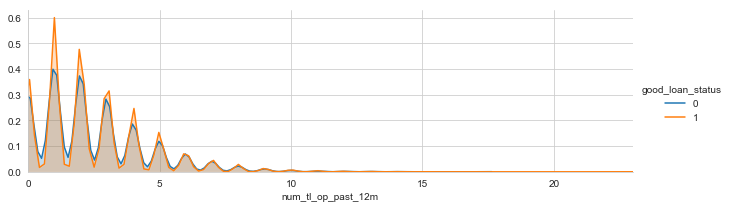

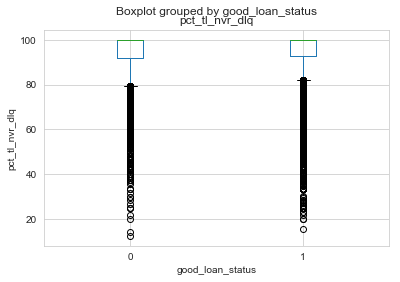

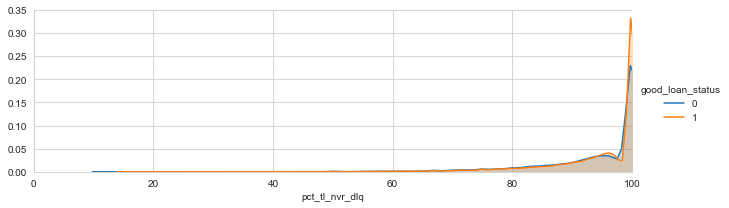

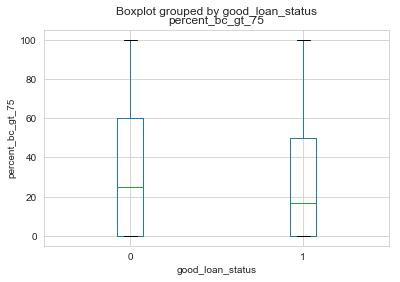

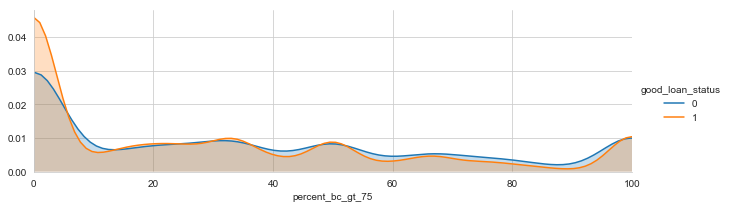

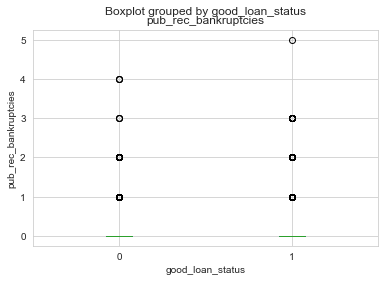

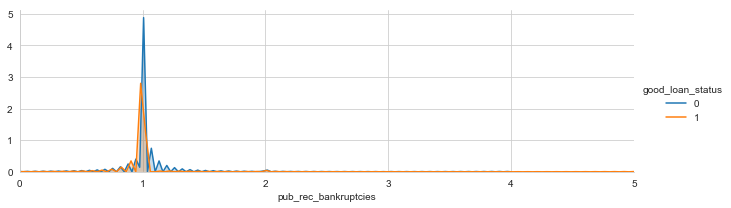

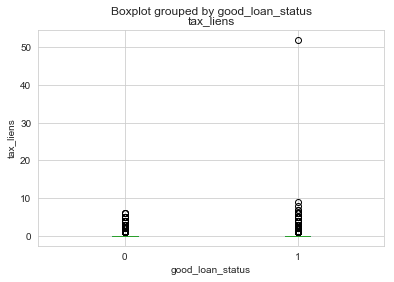

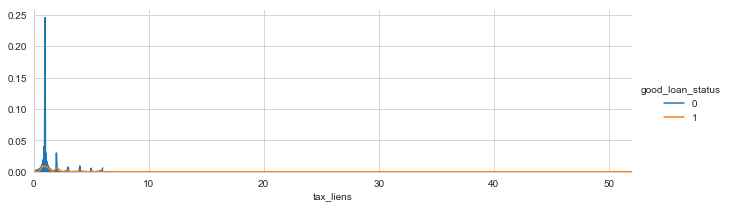

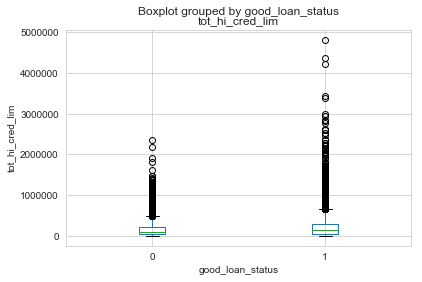

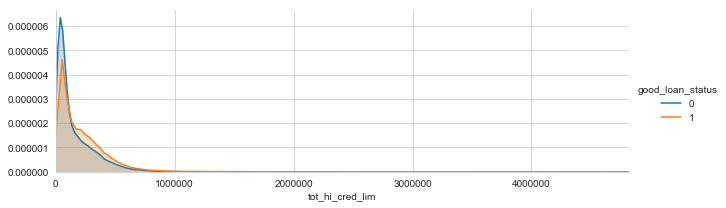

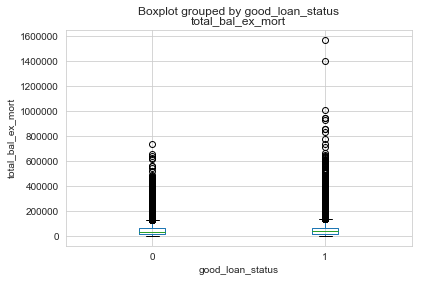

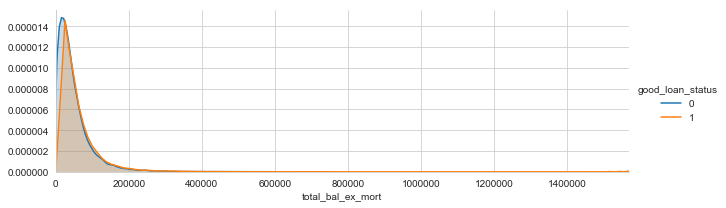

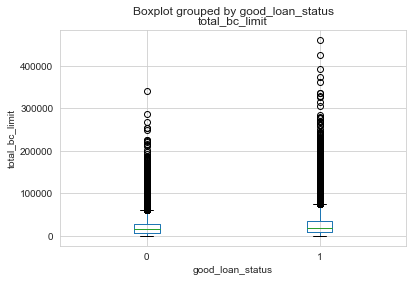

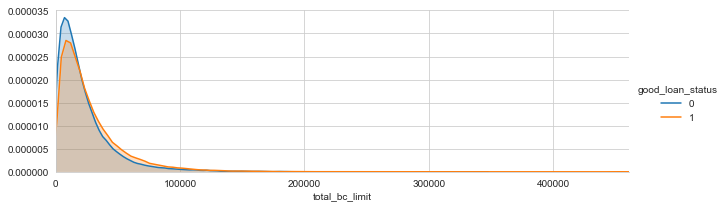

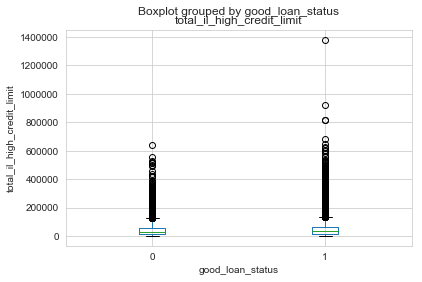

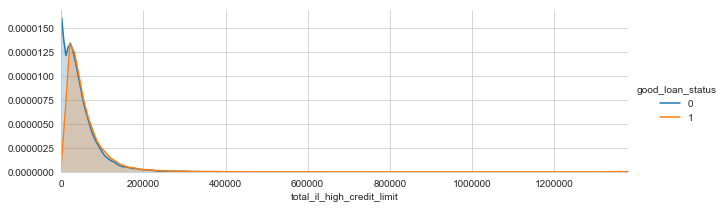

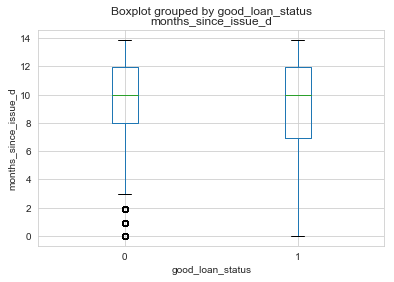

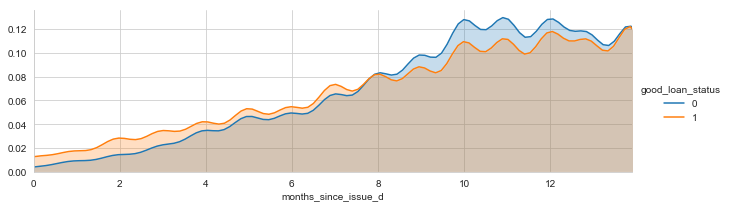

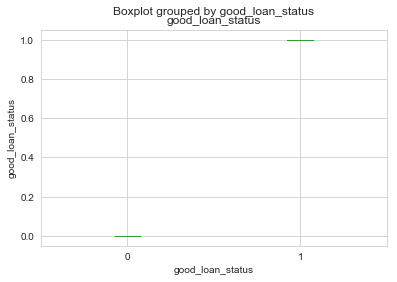

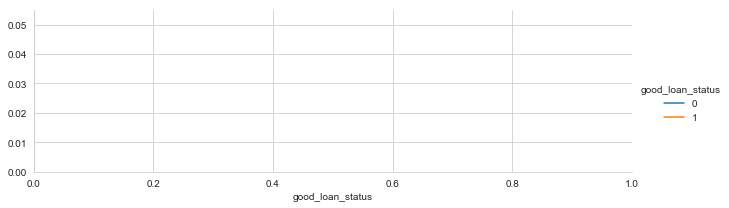

In [69]:
for var in loans_numerical:
    loans.boxplot(column=var,
                  by='good_loan_status')
    plt.xticks()
    plt.xlabel('good_loan_status')
    plt.ylabel(var)
    #sns.countplot(x=var, hue='good_loan_status', data=loans)

    facet = sns.FacetGrid(loans, 
                          hue="good_loan_status", 
                          aspect=3)
    facet.map(sns.kdeplot, 
              var, 
              shade=True)
    facet.set(xlim=(0, loans[var].max()))
    facet.add_legend()

-----

---------

In [70]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
loans_categorical = loans_categorical.apply(le.fit_transform)
loans_categorical.head()

grade  sub_grade  emp_title  emp_length  home_ownership  \
5       0          3      22646           9               3   
14      1          9      21996           1               2   
23      3         15        963          10               3   
28      1          9      18251          10               1   
34      1          8      19031          10               3   

    verification_status  issue_d  loan_status  pymnt_plan  purpose  title  \
5                     1        9            2           0        5      7   
14                    0        9            2           0        8     10   
23                    2        9            0           0        1      2   
28                    2        9            2           0        3      6   
34                    1        9            2           0        2      3   

    zip_code  addr_state  earliest_cr_line  revol_util  initial_list_status  \
5        861          46               253           5                    1   
14       277          10                90         346                    1   
23        96          33               523         756                    1   
28       704          42               421         367                    1   
34       855          46               577         392                    1   

    application_type  
5                  0  
14                 0  
23                 0  
28                 0  
34                 0

In [71]:
# concat df_categorical with original df
loans = loans.drop(loans_categorical.columns, axis=1)
loans = pd.concat([loans, loans_categorical], axis=1)
loans.head()

loan_amnt  installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  \
5      3000.0        93.10     52000.0   0.58          0.0             0.0   
14     5000.0       166.03     55000.0  14.18          0.0             0.0   
23    20300.0       509.66     55000.0  26.63          0.0             0.0   
28     7000.0       232.44     40000.0  20.25          0.0             0.0   
34    10000.0       326.92     52320.0  12.87          0.0             1.0   

    open_acc  pub_rec  revol_bal  total_acc        ...         loan_status  \
5        7.0      0.0      141.0       30.0        ...                   2   
14      14.0      1.0    11449.0       24.0        ...                   2   
23      10.0      0.0    17506.0       26.0        ...                   0   
28      13.0      0.0     5004.0       29.0        ...                   2   
34       6.0      1.0     1692.0       26.0        ...                   2   

    pymnt_plan  purpose  title  zip_code  addr_state  earliest_cr_line  \
5            0        5      7       861          46               253   
14           0        8     10       277          10                90   
23           0        1      2        96          33               523   
28           0        3      6       704          42               421   
34           0        2      3       855          46               577   

    revol_util  initial_list_status  application_type  
5            5                    1                 0  
14         346                    1                 0  
23         756                    1                 0  
28         367                    1                 0  
34         392                    1                 0  

[5 rows x 77 columns]

In [72]:
loans.shape

(87923, 77)

In [73]:
loans.columns

Index(['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'collections_12_mths_ex_med', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_

In [74]:
# drop the date because we already have the months in the data frame
loans = loans.drop(['issue_d',
                    'loan_status'], axis=1)

__Run VIF to drop all VIF factores over 10. Also removing features that arenot needed.__

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# For each x, calculate VIF and save in dataframe
vif = pd.DataFrame()
x = add_constant(loans_numerical.iloc[:, 1:])
vif["VIF#"] = [variance_inflation_factor(
    x.values, i) for i in range(x.shape[1])]
vif["Attributes"] = x.columns
# if
vif.sort_values('VIF#', ascending=False)

VIF#                  Attributes
6   1151.343622                    open_acc
7   1135.213796                     pub_rec
47  1104.457158                    num_sats
52   742.180195        pub_rec_bankruptcies
9    626.125728                   total_acc
53   376.611568                   tax_liens
0    306.781702                       const
45   270.259365               num_rev_accts
43   229.198960                   num_il_tl
44   102.991510               num_op_rev_tl
25    70.776375        acc_open_past_24mths
49    49.361919          num_tl_op_past_12m
18    47.618272                 open_rv_24m
46    44.933450         num_rev_tl_bal_gt_0
40    43.179104             num_actv_rev_tl
12    32.318761                 open_act_il
17    31.524215                 open_rv_12m
56    24.692248              total_bc_limit
14    20.625356                 open_il_24m
27    19.860057              bc_open_to_buy
55    19.322169           total_bal_ex_mort
21    18.549373            total_rev_hi_lim
57    16.251178  total_il_high_credit_limit
13    14.766690                 open_il_12m
35    13.045891                    mort_acc
8     11.983059                   revol_bal
41    11.870015                 num_bc_sats
42     9.829563                   num_bc_tl
39     9.672786              num_actv_bc_tl
54     7.632994             tot_hi_cred_lim
28     5.862622                     bc_util
26     4.646193                 avg_cur_bal
19     4.117123                  max_bal_bc
20     3.681126                    all_util
51     3.602868            percent_bc_gt_75
11     2.492485                 open_acc_6m
33     2.317150       mo_sin_rcnt_rev_tl_op
24     2.280961                inq_last_12m
4      2.209552                 delinq_2yrs
16     2.089649                     il_util
48     2.042865          num_tl_90g_dpd_24m
50     2.042667              pct_tl_nvr_dlq
34     1.983969              mo_sin_rcnt_tl
38     1.861937       num_accts_ever_120_pd
22     1.772192                      inq_fi
5      1.745180              inq_last_6mths
36     1.724750        mths_since_recent_bc
37     1.671625       mths_since_recent_inq
15     1.443287          mths_since_rcnt_il
32     1.405892        mo_sin_old_rev_tl_op
31     1.326381          mo_sin_old_il_acct
23     1.305281                 total_cu_tl
2      1.300875                  annual_inc
1      1.213894                 installment
3      1.152890                         dti
29     1.081373    chargeoff_within_12_mths
59     1.076949            good_loan_status
10     1.026487  collections_12_mths_ex_med
58     1.016194        months_since_issue_d
30     1.006267                 delinq_amnt

In [76]:
loans.drop(['open_acc',
            'pub_rec',
            'num_sats',
            'pub_rec_bankruptcies',
            'total_acc',
            'tax_liens',
            'num_rev_accts',
            'num_il_tl',
            'num_op_rev_tl',
            'acc_open_past_24mths',
            'num_tl_op_past_12m',
            'open_rv_24m',
            'num_rev_tl_bal_gt_0',
            'num_actv_rev_tl',
            'open_act_il',
            'open_rv_12m',
            'total_bc_limit',
            'sub_grade',
            'open_il_24m',
            'grade',
            'bc_open_to_buy',
            'total_bal_ex_mort',
            'total_rev_hi_lim',
            'total_il_high_credit_limit',
            'open_il_12m',
            'mort_acc',
            'revol_bal',
            'num_bc_sats',
            'zip_code',
            'installment',
            'title',
           'bc_util',
           'avg_cur_bal'], inplace=True, axis=1)

In [77]:
loans.columns

Index(['loan_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'collections_12_mths_ex_med', 'open_acc_6m', 'mths_since_rcnt_il',
       'il_util', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_tl',
       'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'tot_hi_cred_lim', 'months_since_issue_d', 'good_loan_status',
       'emp_title', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line', 'revol_util',
       'initial_list_status', 'application_type'],
      dtype='object')

In [78]:
loans.shape

(87923, 42)

In [79]:
loanAttributes[loanAttributes['LoanStatNew'] == 'application_type']
# initial_list_status
# pymnt_plan
#

LoanStatNew  \
6  application_type   

                                                                                            Description  
6  Indicates whether the loan is an individual application or a joint application with two co-borrowers

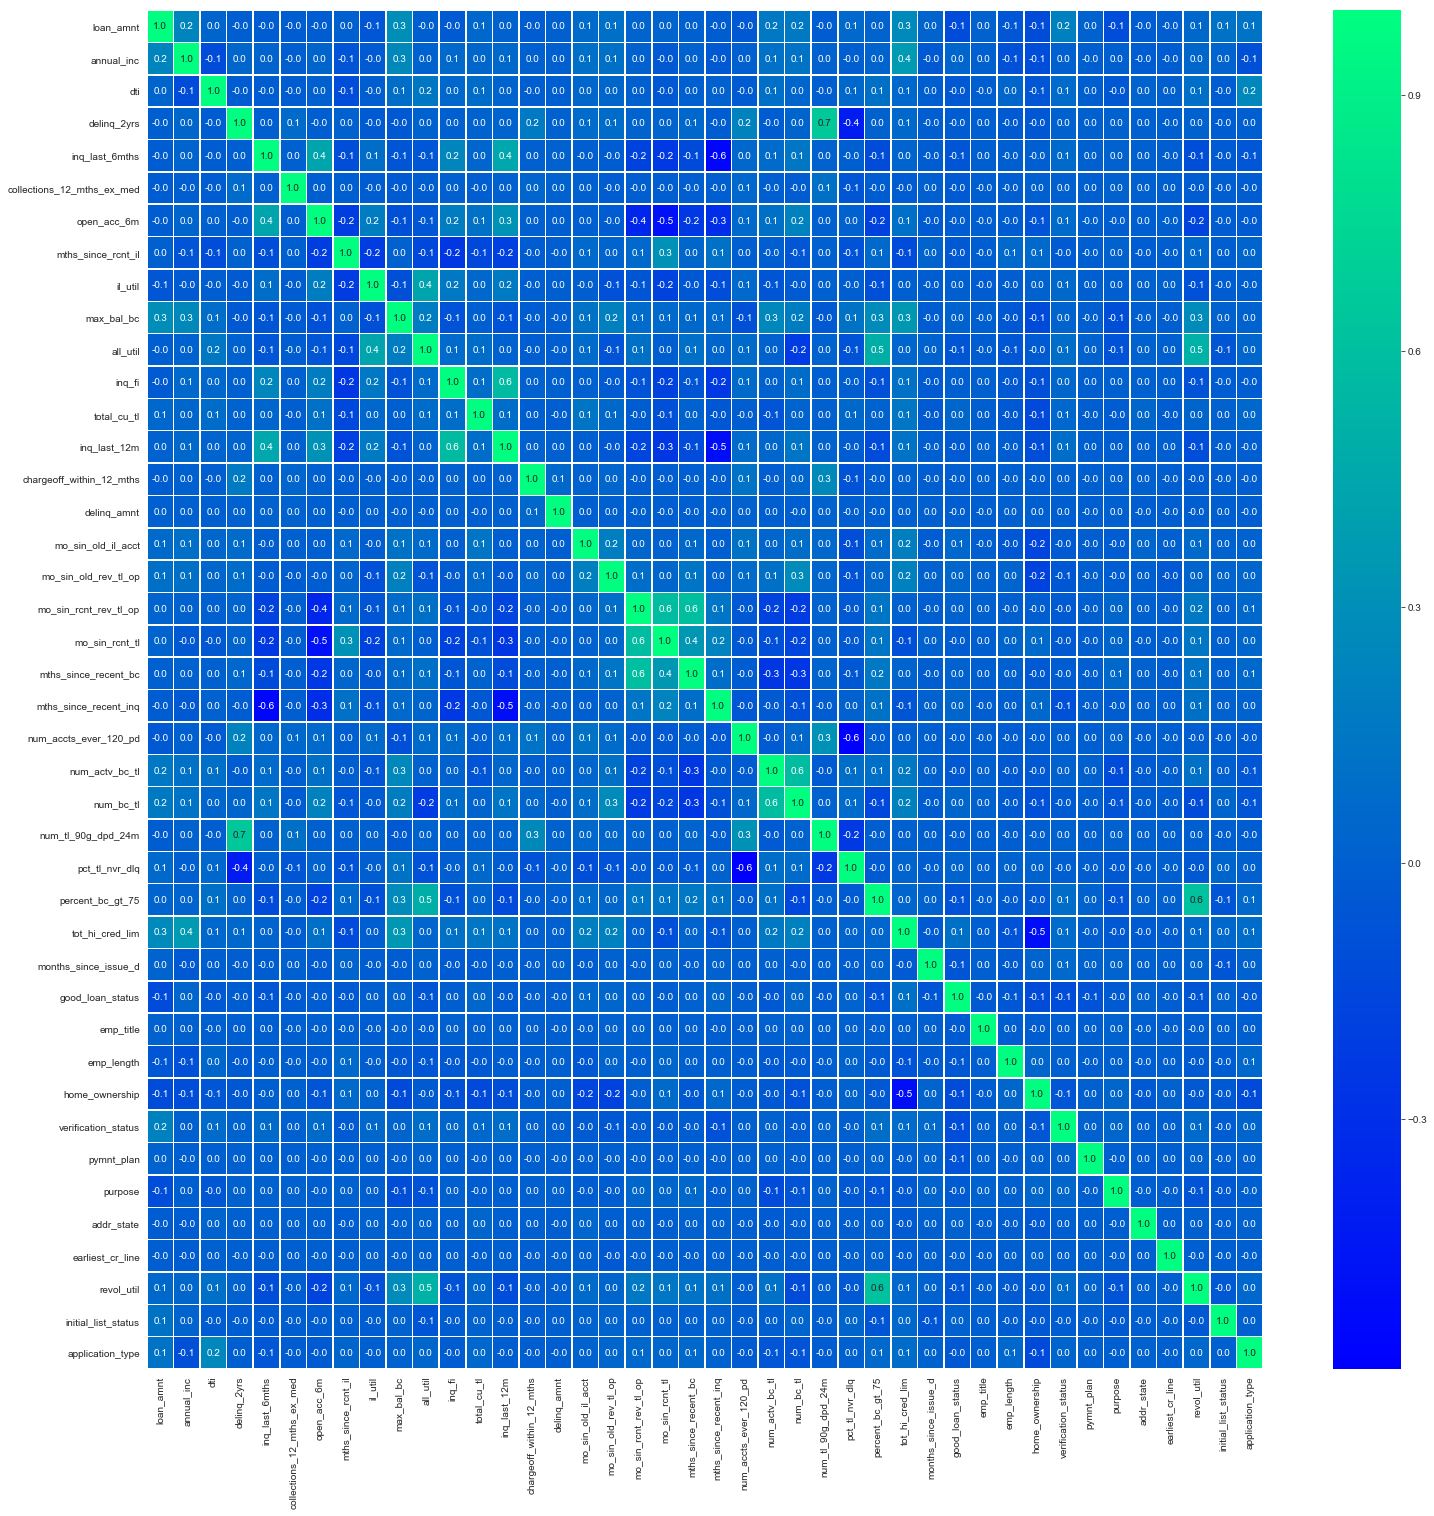

In [80]:
# Is there collinearity?
plt.figure(figsize=(25, 25))
sns.heatmap(data=loans.corr(), cmap="winter",
            fmt=".1f", linewidths=.5, annot=True)

'''f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)'''
plt.show()

In [81]:
loans.shape

(87923, 42)

In [85]:
loans


loan_amnt  annual_inc    dti  delinq_2yrs  inq_last_6mths  \
5          3000.0     52000.0   0.58          0.0             0.0   
14         5000.0     55000.0  14.18          0.0             0.0   
23        20300.0     55000.0  26.63          0.0             0.0   
28         7000.0     40000.0  20.25          0.0             0.0   
34        10000.0     52320.0  12.87          0.0             1.0   
39        28000.0    103000.0  30.76          0.0             0.0   
43        40000.0    150000.0   4.09          0.0             0.0   
44        30000.0     57000.0  27.58          0.0             1.0   
45        21000.0     85000.0  15.76          1.0             0.0   
49         5000.0     36610.0  13.85          0.0             1.0   
54        12500.0    110000.0  14.10          0.0             1.0   
64        20000.0     92000.0  11.40          0.0             0.0   
66        15000.0     86000.0   9.66          0.0             0.0   
68        14100.0    128000.0  14.12          1.0             0.0   
72         3000.0     50000.0  36.44          0.0             0.0   
75        30000.0     84000.0  12.07          8.0             2.0   
77        12000.0     38000.0  21.45          0.0             1.0   
85        12000.0     43000.0  22.75          0.0             0.0   
86        18500.0     82985.0  18.66          1.0             0.0   
87        19000.0     50000.0  17.76          2.0             3.0   
88         3125.0    100000.0  36.21          0.0             1.0   
94        17000.0     70000.0  22.05          0.0             0.0   
100       24000.0     73620.0  18.47          1.0             0.0   
101       20000.0     33500.0  24.40          0.0             1.0   
105       10000.0     60000.0   1.36          0.0             0.0   
107       20000.0     94796.0  18.13          0.0             1.0   
116       25000.0     35000.0  53.03          0.0             3.0   
118       10000.0     42000.0  24.69          0.0             0.0   
122       25000.0     86000.0  29.75          1.0             0.0   
125        1000.0     51000.0  10.56          0.0             1.0   
...           ...         ...    ...          ...             ...   
610391    10000.0    170000.0   4.69          1.0             4.0   
610416     3600.0     83000.0  13.00          0.0             1.0   
610456     6500.0     21404.0  25.24          0.0             0.0   
610459    16250.0     63000.0  23.49          0.0             0.0   
610460     1000.0     54000.0  34.04          2.0             1.0   
610469    17500.0     77000.0   9.40          0.0             1.0   
610470    40000.0    150000.0   7.08          0.0             3.0   
610474    40000.0    150000.0   9.77          0.0             0.0   
610550     7500.0    119000.0  10.43          0.0             0.0   
610571    10000.0     50000.0  37.21          1.0             0.0   
610585     6000.0     60000.0   4.52          1.0             0.0   
610607    20000.0    120000.0  18.84          0.0             0.0   
610610     9500.0     62000.0  20.27          0.0             0.0   
610630    20000.0    125000.0  22.78          0.0             1.0   
610651    18000.0     52000.0   7.85          0.0             1.0   
610686     5000.0    104000.0  22.01          0.0             0.0   
610702    30000.0     49000.0  13.03          0.0             0.0   
610705    10000.0     65000.0   1.16          0.0             0.0   
610755    20000.0    125000.0   7.38          0.0             0.0   
610758    18000.0     62000.0  10.19          0.0             0.0   
610776     7000.0     20160.0   9.86          2.0             1.0   
610786    32000.0     63000.0  26.21          0.0             0.0   
610794    18100.0    130000.0   4.30          0.0             2.0   
610823    35000.0    124000.0  18.12          0.0             0.0   
610839    15000.0     59000.0  30.88          1.0             2.0   
610845    25000.0    100000.0  25.09          1.0             0.0   
610851

In [82]:
loans.to_csv('lending_club_le.csv')

------